In [1]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging
from src.post_processing import *
from collections import defaultdict
# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [2]:
model_type = 'shared-layer'

scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [4]:
# prediction_horizons = [15,30,60,90,120,150,180]
# prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
# prediction_horizons = [6]
# prediction_horizons = [24]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [4]:
for prediction_horizon in prediction_horizons:
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5): # indicating 5 runs 

        logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
        print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
        
        # model = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
        # model = model.to(device)
        # model, history = train_model(model, train_loader, val_loader = validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
        # histories_withval_PHs[prediction_horizon] = history

        model_all_train = SharedLayerModelWithAttention(input_shape=input_shape , output_shape=output_shape) 
        model_all_train = model_all_train.to(device)
        model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=150, learning_rate=0.00001, model_type = model_type)
        histories_noval_PHs[prediction_horizon] = history2


        # model_all_train.eval()
        # each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


        
        # multiple_runs_each_patient_mae.append(each_patient_mae)
        # multiple_runs_each_patient_rmse.append(each_patient_rmse)




        logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{str(i)}.pth')
        print(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
        logger.info(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
    # abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    # squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

Start Prediction Horizon 24 of shared-layer model


Epoch 1/150: 100%|██████████| 213/213 [00:59<00:00,  3.61batch/s, mae_loss=0.724]


Epoch [1/150], Training MAE: 0.6944, Training RMSE: 0.9184
Epoch [1/150], Validation MAE: 0.5536, Validation RMSE: 0.8079


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.601]


Epoch [2/150], Training MAE: 0.6659, Training RMSE: 0.8880
Epoch [2/150], Validation MAE: 0.5366, Validation RMSE: 0.7857


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.666]


Epoch [3/150], Training MAE: 0.6498, Training RMSE: 0.8699
Epoch [3/150], Validation MAE: 0.5314, Validation RMSE: 0.7757


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.6]  


Epoch [4/150], Training MAE: 0.6395, Training RMSE: 0.8584
Epoch [4/150], Validation MAE: 0.5248, Validation RMSE: 0.7671


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.86batch/s, mae_loss=0.596]


Epoch [5/150], Training MAE: 0.6340, Training RMSE: 0.8523
Epoch [5/150], Validation MAE: 0.5249, Validation RMSE: 0.7643


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.693]


Epoch [6/150], Training MAE: 0.6301, Training RMSE: 0.8480
Epoch [6/150], Validation MAE: 0.5239, Validation RMSE: 0.7612


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.592]


Epoch [7/150], Training MAE: 0.6268, Training RMSE: 0.8452
Epoch [7/150], Validation MAE: 0.5226, Validation RMSE: 0.7584


Epoch 8/150: 100%|██████████| 213/213 [00:27<00:00,  7.77batch/s, mae_loss=0.654]


Epoch [8/150], Training MAE: 0.6243, Training RMSE: 0.8425
Epoch [8/150], Validation MAE: 0.5223, Validation RMSE: 0.7587


Epoch 9/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.625]


Epoch [9/150], Training MAE: 0.6214, Training RMSE: 0.8396
Epoch [9/150], Validation MAE: 0.5204, Validation RMSE: 0.7547


Epoch 10/150: 100%|██████████| 213/213 [00:32<00:00,  6.57batch/s, mae_loss=0.639]


Epoch [10/150], Training MAE: 0.6185, Training RMSE: 0.8364
Epoch [10/150], Validation MAE: 0.5190, Validation RMSE: 0.7522


Epoch 11/150: 100%|██████████| 213/213 [00:26<00:00,  8.00batch/s, mae_loss=0.603]


Epoch [11/150], Training MAE: 0.6158, Training RMSE: 0.8336
Epoch [11/150], Validation MAE: 0.5183, Validation RMSE: 0.7510


Epoch 12/150: 100%|██████████| 213/213 [00:26<00:00,  7.98batch/s, mae_loss=0.594]


Epoch [12/150], Training MAE: 0.6136, Training RMSE: 0.8314
Epoch [12/150], Validation MAE: 0.5153, Validation RMSE: 0.7479


Epoch 13/150: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.625]


Epoch [13/150], Training MAE: 0.6113, Training RMSE: 0.8289
Epoch [13/150], Validation MAE: 0.5153, Validation RMSE: 0.7464


Epoch 14/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.629]


Epoch [14/150], Training MAE: 0.6089, Training RMSE: 0.8264
Epoch [14/150], Validation MAE: 0.5151, Validation RMSE: 0.7466


Epoch 15/150: 100%|██████████| 213/213 [00:27<00:00,  7.85batch/s, mae_loss=0.617]


Epoch [15/150], Training MAE: 0.6058, Training RMSE: 0.8229
Epoch [15/150], Validation MAE: 0.5099, Validation RMSE: 0.7406


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.599]


Epoch [16/150], Training MAE: 0.6026, Training RMSE: 0.8196
Epoch [16/150], Validation MAE: 0.5109, Validation RMSE: 0.7393


Epoch 17/150: 100%|██████████| 213/213 [00:28<00:00,  7.46batch/s, mae_loss=0.579]


Epoch [17/150], Training MAE: 0.6006, Training RMSE: 0.8167
Epoch [17/150], Validation MAE: 0.5089, Validation RMSE: 0.7378


Epoch 18/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.555]


Epoch [18/150], Training MAE: 0.5975, Training RMSE: 0.8135
Epoch [18/150], Validation MAE: 0.5090, Validation RMSE: 0.7363


Epoch 19/150: 100%|██████████| 213/213 [00:28<00:00,  7.39batch/s, mae_loss=0.56] 


Epoch [19/150], Training MAE: 0.5948, Training RMSE: 0.8104
Epoch [19/150], Validation MAE: 0.5084, Validation RMSE: 0.7349


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.606]


Epoch [20/150], Training MAE: 0.5934, Training RMSE: 0.8093
Epoch [20/150], Validation MAE: 0.5083, Validation RMSE: 0.7347


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.572]


Epoch [21/150], Training MAE: 0.5910, Training RMSE: 0.8067
Epoch [21/150], Validation MAE: 0.5075, Validation RMSE: 0.7343


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.644]


Epoch [22/150], Training MAE: 0.5893, Training RMSE: 0.8048
Epoch [22/150], Validation MAE: 0.5070, Validation RMSE: 0.7333


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.541]


Epoch [23/150], Training MAE: 0.5877, Training RMSE: 0.8030
Epoch [23/150], Validation MAE: 0.5079, Validation RMSE: 0.7335


Epoch 24/150: 100%|██████████| 213/213 [00:26<00:00,  7.96batch/s, mae_loss=0.567]


Epoch [24/150], Training MAE: 0.5862, Training RMSE: 0.8012
Epoch [24/150], Validation MAE: 0.5074, Validation RMSE: 0.7326


Epoch 25/150: 100%|██████████| 213/213 [00:28<00:00,  7.43batch/s, mae_loss=0.547]


Epoch [25/150], Training MAE: 0.5838, Training RMSE: 0.7990
Epoch [25/150], Validation MAE: 0.5041, Validation RMSE: 0.7295


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.19batch/s, mae_loss=0.608]


Epoch [26/150], Training MAE: 0.5838, Training RMSE: 0.7984
Epoch [26/150], Validation MAE: 0.5060, Validation RMSE: 0.7309


Epoch 27/150: 100%|██████████| 213/213 [00:30<00:00,  7.02batch/s, mae_loss=0.601]


Epoch [27/150], Training MAE: 0.5821, Training RMSE: 0.7971
Epoch [27/150], Validation MAE: 0.5053, Validation RMSE: 0.7300


Epoch 28/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.628]


Epoch [28/150], Training MAE: 0.5813, Training RMSE: 0.7955
Epoch [28/150], Validation MAE: 0.5067, Validation RMSE: 0.7291


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.557]


Epoch [29/150], Training MAE: 0.5795, Training RMSE: 0.7937
Epoch [29/150], Validation MAE: 0.5053, Validation RMSE: 0.7277


Epoch 30/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.59] 


Epoch [30/150], Training MAE: 0.5789, Training RMSE: 0.7933
Epoch [30/150], Validation MAE: 0.5045, Validation RMSE: 0.7272


Epoch 31/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.579]


Epoch [31/150], Training MAE: 0.5771, Training RMSE: 0.7913
Epoch [31/150], Validation MAE: 0.5041, Validation RMSE: 0.7267


Epoch 32/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.565]


Epoch [32/150], Training MAE: 0.5772, Training RMSE: 0.7914
Epoch [32/150], Validation MAE: 0.5053, Validation RMSE: 0.7274


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.581]


Epoch [33/150], Training MAE: 0.5761, Training RMSE: 0.7904
Epoch [33/150], Validation MAE: 0.5056, Validation RMSE: 0.7278


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.568]


Epoch [34/150], Training MAE: 0.5746, Training RMSE: 0.7884
Epoch [34/150], Validation MAE: 0.5029, Validation RMSE: 0.7248


Epoch 35/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.685]


Epoch [35/150], Training MAE: 0.5750, Training RMSE: 0.7887
Epoch [35/150], Validation MAE: 0.5032, Validation RMSE: 0.7252


Epoch 36/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.529]


Epoch [36/150], Training MAE: 0.5733, Training RMSE: 0.7870
Epoch [36/150], Validation MAE: 0.5037, Validation RMSE: 0.7255


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.633]


Epoch [37/150], Training MAE: 0.5731, Training RMSE: 0.7869
Epoch [37/150], Validation MAE: 0.5029, Validation RMSE: 0.7242


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.546]


Epoch [38/150], Training MAE: 0.5718, Training RMSE: 0.7852
Epoch [38/150], Validation MAE: 0.5043, Validation RMSE: 0.7247


Epoch 39/150: 100%|██████████| 213/213 [00:23<00:00,  8.95batch/s, mae_loss=0.572]


Epoch [39/150], Training MAE: 0.5712, Training RMSE: 0.7851
Epoch [39/150], Validation MAE: 0.5036, Validation RMSE: 0.7253


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.87batch/s, mae_loss=0.593]


Epoch [40/150], Training MAE: 0.5703, Training RMSE: 0.7840
Epoch [40/150], Validation MAE: 0.5028, Validation RMSE: 0.7239


Epoch 41/150: 100%|██████████| 213/213 [00:26<00:00,  7.93batch/s, mae_loss=0.622]


Epoch [41/150], Training MAE: 0.5695, Training RMSE: 0.7827
Epoch [41/150], Validation MAE: 0.5044, Validation RMSE: 0.7247


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.599]


Epoch [42/150], Training MAE: 0.5688, Training RMSE: 0.7821
Epoch [42/150], Validation MAE: 0.5066, Validation RMSE: 0.7273


Epoch 43/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.589]


Epoch [43/150], Training MAE: 0.5686, Training RMSE: 0.7822
Epoch [43/150], Validation MAE: 0.5081, Validation RMSE: 0.7282


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.55] 


Epoch [44/150], Training MAE: 0.5673, Training RMSE: 0.7808
Epoch [44/150], Validation MAE: 0.5050, Validation RMSE: 0.7254


Epoch 45/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.578]


Epoch [45/150], Training MAE: 0.5665, Training RMSE: 0.7797
Epoch [45/150], Validation MAE: 0.5058, Validation RMSE: 0.7261


Epoch 46/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.553]


Epoch [46/150], Training MAE: 0.5657, Training RMSE: 0.7788
Epoch [46/150], Validation MAE: 0.5050, Validation RMSE: 0.7240


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.58] 


Epoch [47/150], Training MAE: 0.5654, Training RMSE: 0.7782
Epoch [47/150], Validation MAE: 0.5037, Validation RMSE: 0.7243


Epoch 48/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.584]


Epoch [48/150], Training MAE: 0.5644, Training RMSE: 0.7776
Epoch [48/150], Validation MAE: 0.5039, Validation RMSE: 0.7234


Epoch 49/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.601]


Epoch [49/150], Training MAE: 0.5633, Training RMSE: 0.7767
Epoch [49/150], Validation MAE: 0.5060, Validation RMSE: 0.7264


Epoch 50/150: 100%|██████████| 213/213 [00:28<00:00,  7.43batch/s, mae_loss=0.522]


Epoch [50/150], Training MAE: 0.5631, Training RMSE: 0.7763
Epoch [50/150], Validation MAE: 0.5071, Validation RMSE: 0.7257


Epoch 51/150: 100%|██████████| 213/213 [00:26<00:00,  7.92batch/s, mae_loss=0.533]


Epoch [51/150], Training MAE: 0.5623, Training RMSE: 0.7753
Epoch [51/150], Validation MAE: 0.5064, Validation RMSE: 0.7269


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.572]


Epoch [52/150], Training MAE: 0.5620, Training RMSE: 0.7747
Epoch [52/150], Validation MAE: 0.5050, Validation RMSE: 0.7242


Epoch 53/150: 100%|██████████| 213/213 [00:23<00:00,  9.15batch/s, mae_loss=0.537]


Epoch [53/150], Training MAE: 0.5610, Training RMSE: 0.7735
Epoch [53/150], Validation MAE: 0.5042, Validation RMSE: 0.7246


Epoch 54/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.539]


Epoch [54/150], Training MAE: 0.5604, Training RMSE: 0.7733
Epoch [54/150], Validation MAE: 0.5084, Validation RMSE: 0.7289


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.552]


Epoch [55/150], Training MAE: 0.5598, Training RMSE: 0.7727
Epoch [55/150], Validation MAE: 0.5064, Validation RMSE: 0.7261


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.513]


Epoch [56/150], Training MAE: 0.5591, Training RMSE: 0.7718
Epoch [56/150], Validation MAE: 0.5060, Validation RMSE: 0.7259


Epoch 57/150: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.548]


Epoch [57/150], Training MAE: 0.5590, Training RMSE: 0.7715
Epoch [57/150], Validation MAE: 0.5084, Validation RMSE: 0.7271


Epoch 58/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.507]


Epoch [58/150], Training MAE: 0.5579, Training RMSE: 0.7703
Epoch [58/150], Validation MAE: 0.5065, Validation RMSE: 0.7247


Epoch 59/150: 100%|██████████| 213/213 [00:29<00:00,  7.30batch/s, mae_loss=0.574]


Epoch [59/150], Training MAE: 0.5578, Training RMSE: 0.7697
Epoch [59/150], Validation MAE: 0.5067, Validation RMSE: 0.7258


Epoch 60/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.566]


Epoch [60/150], Training MAE: 0.5567, Training RMSE: 0.7691
Epoch [60/150], Validation MAE: 0.5084, Validation RMSE: 0.7260


Epoch 61/150: 100%|██████████| 213/213 [00:27<00:00,  7.78batch/s, mae_loss=0.533]


Epoch [61/150], Training MAE: 0.5556, Training RMSE: 0.7679
Epoch [61/150], Validation MAE: 0.5082, Validation RMSE: 0.7256


Epoch 62/150: 100%|██████████| 213/213 [00:27<00:00,  7.68batch/s, mae_loss=0.538]


Epoch [62/150], Training MAE: 0.5559, Training RMSE: 0.7680
Epoch [62/150], Validation MAE: 0.5076, Validation RMSE: 0.7267


Epoch 63/150: 100%|██████████| 213/213 [00:29<00:00,  7.34batch/s, mae_loss=0.549]


Epoch [63/150], Training MAE: 0.5549, Training RMSE: 0.7671
Epoch [63/150], Validation MAE: 0.5080, Validation RMSE: 0.7277


Epoch 64/150: 100%|██████████| 213/213 [00:28<00:00,  7.51batch/s, mae_loss=0.57] 


Epoch [64/150], Training MAE: 0.5543, Training RMSE: 0.7667
Epoch [64/150], Validation MAE: 0.5065, Validation RMSE: 0.7256


Epoch 65/150: 100%|██████████| 213/213 [00:26<00:00,  7.99batch/s, mae_loss=0.637]


Epoch [65/150], Training MAE: 0.5541, Training RMSE: 0.7662
Epoch [65/150], Validation MAE: 0.5065, Validation RMSE: 0.7253


Epoch 66/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.518]


Epoch [66/150], Training MAE: 0.5534, Training RMSE: 0.7651
Epoch [66/150], Validation MAE: 0.5088, Validation RMSE: 0.7272


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.555]


Epoch [67/150], Training MAE: 0.5521, Training RMSE: 0.7644
Epoch [67/150], Validation MAE: 0.5092, Validation RMSE: 0.7274


Epoch 68/150: 100%|██████████| 213/213 [00:23<00:00,  8.95batch/s, mae_loss=0.554]


Epoch [68/150], Training MAE: 0.5522, Training RMSE: 0.7640
Epoch [68/150], Validation MAE: 0.5066, Validation RMSE: 0.7242


Epoch 69/150: 100%|██████████| 213/213 [00:26<00:00,  7.93batch/s, mae_loss=0.551]


Epoch [69/150], Training MAE: 0.5514, Training RMSE: 0.7633
Epoch [69/150], Validation MAE: 0.5109, Validation RMSE: 0.7301


Epoch 70/150: 100%|██████████| 213/213 [00:26<00:00,  8.01batch/s, mae_loss=0.505]


Epoch [70/150], Training MAE: 0.5506, Training RMSE: 0.7624
Epoch [70/150], Validation MAE: 0.5094, Validation RMSE: 0.7276


Epoch 71/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.53] 


Epoch [71/150], Training MAE: 0.5495, Training RMSE: 0.7613
Epoch [71/150], Validation MAE: 0.5103, Validation RMSE: 0.7277


Epoch 72/150: 100%|██████████| 213/213 [00:28<00:00,  7.52batch/s, mae_loss=0.518]


Epoch [72/150], Training MAE: 0.5493, Training RMSE: 0.7614
Epoch [72/150], Validation MAE: 0.5088, Validation RMSE: 0.7276


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.522]


Epoch [73/150], Training MAE: 0.5481, Training RMSE: 0.7601
Epoch [73/150], Validation MAE: 0.5101, Validation RMSE: 0.7272


Epoch 74/150: 100%|██████████| 213/213 [00:27<00:00,  7.68batch/s, mae_loss=0.529]


Epoch [74/150], Training MAE: 0.5475, Training RMSE: 0.7587
Epoch [74/150], Validation MAE: 0.5119, Validation RMSE: 0.7307


Epoch 75/150: 100%|██████████| 213/213 [00:28<00:00,  7.39batch/s, mae_loss=0.497]


Epoch [75/150], Training MAE: 0.5471, Training RMSE: 0.7586
Epoch [75/150], Validation MAE: 0.5124, Validation RMSE: 0.7298


Epoch 76/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.582]


Epoch [76/150], Training MAE: 0.5467, Training RMSE: 0.7580
Epoch [76/150], Validation MAE: 0.5123, Validation RMSE: 0.7302


Epoch 77/150: 100%|██████████| 213/213 [00:26<00:00,  8.07batch/s, mae_loss=0.601]


Epoch [77/150], Training MAE: 0.5455, Training RMSE: 0.7567
Epoch [77/150], Validation MAE: 0.5115, Validation RMSE: 0.7304


Epoch 78/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.56] 


Epoch [78/150], Training MAE: 0.5452, Training RMSE: 0.7565
Epoch [78/150], Validation MAE: 0.5114, Validation RMSE: 0.7292


Epoch 79/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.501]


Epoch [79/150], Training MAE: 0.5449, Training RMSE: 0.7562
Epoch [79/150], Validation MAE: 0.5112, Validation RMSE: 0.7302


Epoch 80/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.527]


Epoch [80/150], Training MAE: 0.5437, Training RMSE: 0.7545
Epoch [80/150], Validation MAE: 0.5124, Validation RMSE: 0.7302


Epoch 81/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.53] 


Epoch [81/150], Training MAE: 0.5438, Training RMSE: 0.7546
Epoch [81/150], Validation MAE: 0.5121, Validation RMSE: 0.7306


Epoch 82/150: 100%|██████████| 213/213 [00:27<00:00,  7.80batch/s, mae_loss=0.553]


Epoch [82/150], Training MAE: 0.5425, Training RMSE: 0.7537
Epoch [82/150], Validation MAE: 0.5127, Validation RMSE: 0.7311


Epoch 83/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.562]


Epoch [83/150], Training MAE: 0.5417, Training RMSE: 0.7528
Epoch [83/150], Validation MAE: 0.5140, Validation RMSE: 0.7318


Epoch 84/150: 100%|██████████| 213/213 [00:27<00:00,  7.88batch/s, mae_loss=0.55] 


Epoch [84/150], Training MAE: 0.5413, Training RMSE: 0.7523
Epoch [84/150], Validation MAE: 0.5143, Validation RMSE: 0.7316


Epoch 85/150: 100%|██████████| 213/213 [00:26<00:00,  7.98batch/s, mae_loss=0.53] 


Epoch [85/150], Training MAE: 0.5406, Training RMSE: 0.7512
Epoch [85/150], Validation MAE: 0.5144, Validation RMSE: 0.7333


Epoch 86/150: 100%|██████████| 213/213 [00:26<00:00,  8.04batch/s, mae_loss=0.535]


Epoch [86/150], Training MAE: 0.5398, Training RMSE: 0.7504
Epoch [86/150], Validation MAE: 0.5150, Validation RMSE: 0.7317


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.54] 


Epoch [87/150], Training MAE: 0.5393, Training RMSE: 0.7495
Epoch [87/150], Validation MAE: 0.5145, Validation RMSE: 0.7328


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.513]


Epoch [88/150], Training MAE: 0.5392, Training RMSE: 0.7495
Epoch [88/150], Validation MAE: 0.5143, Validation RMSE: 0.7312


Epoch 89/150: 100%|██████████| 213/213 [00:23<00:00,  9.03batch/s, mae_loss=0.547]


Epoch [89/150], Training MAE: 0.5376, Training RMSE: 0.7479
Epoch [89/150], Validation MAE: 0.5156, Validation RMSE: 0.7330


Epoch 90/150: 100%|██████████| 213/213 [00:23<00:00,  9.05batch/s, mae_loss=0.509]


Epoch [90/150], Training MAE: 0.5373, Training RMSE: 0.7475
Epoch [90/150], Validation MAE: 0.5152, Validation RMSE: 0.7326


Epoch 91/150: 100%|██████████| 213/213 [00:23<00:00,  9.01batch/s, mae_loss=0.529]


Epoch [91/150], Training MAE: 0.5364, Training RMSE: 0.7463
Epoch [91/150], Validation MAE: 0.5158, Validation RMSE: 0.7330


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.569]


Epoch [92/150], Training MAE: 0.5358, Training RMSE: 0.7458
Epoch [92/150], Validation MAE: 0.5168, Validation RMSE: 0.7352


Epoch 93/150: 100%|██████████| 213/213 [00:23<00:00,  9.02batch/s, mae_loss=0.55] 


Epoch [93/150], Training MAE: 0.5353, Training RMSE: 0.7452
Epoch [93/150], Validation MAE: 0.5157, Validation RMSE: 0.7342


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.566]


Epoch [94/150], Training MAE: 0.5345, Training RMSE: 0.7447
Epoch [94/150], Validation MAE: 0.5167, Validation RMSE: 0.7354


Epoch 95/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.557]


Epoch [95/150], Training MAE: 0.5335, Training RMSE: 0.7430
Epoch [95/150], Validation MAE: 0.5172, Validation RMSE: 0.7352


Epoch 96/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.537]


Epoch [96/150], Training MAE: 0.5324, Training RMSE: 0.7423
Epoch [96/150], Validation MAE: 0.5179, Validation RMSE: 0.7359


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.509]


Epoch [97/150], Training MAE: 0.5322, Training RMSE: 0.7417
Epoch [97/150], Validation MAE: 0.5177, Validation RMSE: 0.7361


Epoch 98/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.551]


Epoch [98/150], Training MAE: 0.5310, Training RMSE: 0.7407
Epoch [98/150], Validation MAE: 0.5197, Validation RMSE: 0.7367


Epoch 99/150: 100%|██████████| 213/213 [00:39<00:00,  5.40batch/s, mae_loss=0.555]


Epoch [99/150], Training MAE: 0.5310, Training RMSE: 0.7402
Epoch [99/150], Validation MAE: 0.5181, Validation RMSE: 0.7346


Epoch 100/150: 100%|██████████| 213/213 [00:30<00:00,  6.96batch/s, mae_loss=0.53] 


Epoch [100/150], Training MAE: 0.5301, Training RMSE: 0.7397
Epoch [100/150], Validation MAE: 0.5215, Validation RMSE: 0.7397


Epoch 101/150: 100%|██████████| 213/213 [00:35<00:00,  5.92batch/s, mae_loss=0.487]


Epoch [101/150], Training MAE: 0.5296, Training RMSE: 0.7387
Epoch [101/150], Validation MAE: 0.5215, Validation RMSE: 0.7395


Epoch 102/150: 100%|██████████| 213/213 [00:33<00:00,  6.37batch/s, mae_loss=0.488]


Epoch [102/150], Training MAE: 0.5289, Training RMSE: 0.7380
Epoch [102/150], Validation MAE: 0.5203, Validation RMSE: 0.7385


Epoch 103/150: 100%|██████████| 213/213 [00:31<00:00,  6.72batch/s, mae_loss=0.523]


Epoch [103/150], Training MAE: 0.5274, Training RMSE: 0.7367
Epoch [103/150], Validation MAE: 0.5191, Validation RMSE: 0.7373


Epoch 104/150: 100%|██████████| 213/213 [00:34<00:00,  6.19batch/s, mae_loss=0.503]


Epoch [104/150], Training MAE: 0.5273, Training RMSE: 0.7358
Epoch [104/150], Validation MAE: 0.5205, Validation RMSE: 0.7393


Epoch 105/150: 100%|██████████| 213/213 [00:31<00:00,  6.78batch/s, mae_loss=0.49] 


Epoch [105/150], Training MAE: 0.5262, Training RMSE: 0.7348
Epoch [105/150], Validation MAE: 0.5230, Validation RMSE: 0.7406


Epoch 106/150: 100%|██████████| 213/213 [00:30<00:00,  6.97batch/s, mae_loss=0.497]


Epoch [106/150], Training MAE: 0.5254, Training RMSE: 0.7338
Epoch [106/150], Validation MAE: 0.5231, Validation RMSE: 0.7401


Epoch 107/150: 100%|██████████| 213/213 [00:33<00:00,  6.39batch/s, mae_loss=0.498]


Epoch [107/150], Training MAE: 0.5247, Training RMSE: 0.7330
Epoch [107/150], Validation MAE: 0.5205, Validation RMSE: 0.7387


Epoch 108/150: 100%|██████████| 213/213 [00:29<00:00,  7.19batch/s, mae_loss=0.488]


Epoch [108/150], Training MAE: 0.5240, Training RMSE: 0.7328
Epoch [108/150], Validation MAE: 0.5219, Validation RMSE: 0.7396


Epoch 109/150: 100%|██████████| 213/213 [00:32<00:00,  6.48batch/s, mae_loss=0.52] 


Epoch [109/150], Training MAE: 0.5237, Training RMSE: 0.7321
Epoch [109/150], Validation MAE: 0.5222, Validation RMSE: 0.7395


Epoch 110/150: 100%|██████████| 213/213 [00:38<00:00,  5.51batch/s, mae_loss=0.496]


Epoch [110/150], Training MAE: 0.5223, Training RMSE: 0.7302
Epoch [110/150], Validation MAE: 0.5233, Validation RMSE: 0.7419


Epoch 111/150: 100%|██████████| 213/213 [00:31<00:00,  6.68batch/s, mae_loss=0.478]


Epoch [111/150], Training MAE: 0.5217, Training RMSE: 0.7299
Epoch [111/150], Validation MAE: 0.5235, Validation RMSE: 0.7418


Epoch 112/150: 100%|██████████| 213/213 [00:35<00:00,  6.07batch/s, mae_loss=0.526]


Epoch [112/150], Training MAE: 0.5213, Training RMSE: 0.7294
Epoch [112/150], Validation MAE: 0.5261, Validation RMSE: 0.7437


Epoch 113/150: 100%|██████████| 213/213 [00:30<00:00,  7.01batch/s, mae_loss=0.473]


Epoch [113/150], Training MAE: 0.5202, Training RMSE: 0.7279
Epoch [113/150], Validation MAE: 0.5261, Validation RMSE: 0.7444


Epoch 114/150: 100%|██████████| 213/213 [00:29<00:00,  7.31batch/s, mae_loss=0.544]


Epoch [114/150], Training MAE: 0.5195, Training RMSE: 0.7272
Epoch [114/150], Validation MAE: 0.5244, Validation RMSE: 0.7424


Epoch 115/150: 100%|██████████| 213/213 [00:33<00:00,  6.45batch/s, mae_loss=0.505]


Epoch [115/150], Training MAE: 0.5187, Training RMSE: 0.7265
Epoch [115/150], Validation MAE: 0.5268, Validation RMSE: 0.7442


Epoch 116/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.547]


Epoch [116/150], Training MAE: 0.5194, Training RMSE: 0.7267
Epoch [116/150], Validation MAE: 0.5251, Validation RMSE: 0.7431


Epoch 117/150: 100%|██████████| 213/213 [00:30<00:00,  7.01batch/s, mae_loss=0.528]


Epoch [117/150], Training MAE: 0.5175, Training RMSE: 0.7253
Epoch [117/150], Validation MAE: 0.5287, Validation RMSE: 0.7477


Epoch 118/150: 100%|██████████| 213/213 [00:29<00:00,  7.20batch/s, mae_loss=0.518]


Epoch [118/150], Training MAE: 0.5172, Training RMSE: 0.7242
Epoch [118/150], Validation MAE: 0.5274, Validation RMSE: 0.7457


Epoch 119/150: 100%|██████████| 213/213 [00:27<00:00,  7.71batch/s, mae_loss=0.553]


Epoch [119/150], Training MAE: 0.5162, Training RMSE: 0.7231
Epoch [119/150], Validation MAE: 0.5291, Validation RMSE: 0.7469


Epoch 120/150: 100%|██████████| 213/213 [00:28<00:00,  7.55batch/s, mae_loss=0.487]


Epoch [120/150], Training MAE: 0.5152, Training RMSE: 0.7219
Epoch [120/150], Validation MAE: 0.5274, Validation RMSE: 0.7451


Epoch 121/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.544]


Epoch [121/150], Training MAE: 0.5144, Training RMSE: 0.7215
Epoch [121/150], Validation MAE: 0.5299, Validation RMSE: 0.7464


Epoch 122/150: 100%|██████████| 213/213 [00:29<00:00,  7.15batch/s, mae_loss=0.521]


Epoch [122/150], Training MAE: 0.5139, Training RMSE: 0.7211
Epoch [122/150], Validation MAE: 0.5277, Validation RMSE: 0.7443


Epoch 123/150: 100%|██████████| 213/213 [00:31<00:00,  6.81batch/s, mae_loss=0.502]


Epoch [123/150], Training MAE: 0.5128, Training RMSE: 0.7195
Epoch [123/150], Validation MAE: 0.5297, Validation RMSE: 0.7466


Epoch 124/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.51] 


Epoch [124/150], Training MAE: 0.5119, Training RMSE: 0.7184
Epoch [124/150], Validation MAE: 0.5309, Validation RMSE: 0.7484


Epoch 125/150: 100%|██████████| 213/213 [00:32<00:00,  6.59batch/s, mae_loss=0.492]


Epoch [125/150], Training MAE: 0.5114, Training RMSE: 0.7174
Epoch [125/150], Validation MAE: 0.5317, Validation RMSE: 0.7480


Epoch 126/150: 100%|██████████| 213/213 [00:35<00:00,  6.05batch/s, mae_loss=0.464]


Epoch [126/150], Training MAE: 0.5103, Training RMSE: 0.7167
Epoch [126/150], Validation MAE: 0.5306, Validation RMSE: 0.7476


Epoch 127/150: 100%|██████████| 213/213 [00:29<00:00,  7.12batch/s, mae_loss=0.483]


Epoch [127/150], Training MAE: 0.5100, Training RMSE: 0.7163
Epoch [127/150], Validation MAE: 0.5317, Validation RMSE: 0.7488


Epoch 128/150: 100%|██████████| 213/213 [00:32<00:00,  6.60batch/s, mae_loss=0.525]


Epoch [128/150], Training MAE: 0.5087, Training RMSE: 0.7147
Epoch [128/150], Validation MAE: 0.5324, Validation RMSE: 0.7493


Epoch 129/150: 100%|██████████| 213/213 [00:28<00:00,  7.58batch/s, mae_loss=0.537]


Epoch [129/150], Training MAE: 0.5082, Training RMSE: 0.7143
Epoch [129/150], Validation MAE: 0.5323, Validation RMSE: 0.7487


Epoch 130/150: 100%|██████████| 213/213 [00:27<00:00,  7.79batch/s, mae_loss=0.538]


Epoch [130/150], Training MAE: 0.5075, Training RMSE: 0.7134
Epoch [130/150], Validation MAE: 0.5333, Validation RMSE: 0.7489


Epoch 131/150: 100%|██████████| 213/213 [00:29<00:00,  7.21batch/s, mae_loss=0.558]


Epoch [131/150], Training MAE: 0.5067, Training RMSE: 0.7127
Epoch [131/150], Validation MAE: 0.5321, Validation RMSE: 0.7484


Epoch 132/150: 100%|██████████| 213/213 [00:30<00:00,  7.08batch/s, mae_loss=0.494]


Epoch [132/150], Training MAE: 0.5056, Training RMSE: 0.7116
Epoch [132/150], Validation MAE: 0.5346, Validation RMSE: 0.7522


Epoch 133/150: 100%|██████████| 213/213 [00:28<00:00,  7.44batch/s, mae_loss=0.453]


Epoch [133/150], Training MAE: 0.5052, Training RMSE: 0.7105
Epoch [133/150], Validation MAE: 0.5351, Validation RMSE: 0.7518


Epoch 134/150: 100%|██████████| 213/213 [00:29<00:00,  7.23batch/s, mae_loss=0.476]


Epoch [134/150], Training MAE: 0.5050, Training RMSE: 0.7100
Epoch [134/150], Validation MAE: 0.5344, Validation RMSE: 0.7509


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.487]


Epoch [135/150], Training MAE: 0.5037, Training RMSE: 0.7094
Epoch [135/150], Validation MAE: 0.5344, Validation RMSE: 0.7503


Epoch 136/150: 100%|██████████| 213/213 [00:26<00:00,  7.97batch/s, mae_loss=0.47] 


Epoch [136/150], Training MAE: 0.5033, Training RMSE: 0.7084
Epoch [136/150], Validation MAE: 0.5330, Validation RMSE: 0.7487


Epoch 137/150: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.513]


Epoch [137/150], Training MAE: 0.5025, Training RMSE: 0.7079
Epoch [137/150], Validation MAE: 0.5356, Validation RMSE: 0.7513


Epoch 138/150: 100%|██████████| 213/213 [00:30<00:00,  7.06batch/s, mae_loss=0.512]


Epoch [138/150], Training MAE: 0.5012, Training RMSE: 0.7066
Epoch [138/150], Validation MAE: 0.5362, Validation RMSE: 0.7520


Epoch 139/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.486]


Epoch [139/150], Training MAE: 0.5009, Training RMSE: 0.7060
Epoch [139/150], Validation MAE: 0.5388, Validation RMSE: 0.7556


Epoch 140/150: 100%|██████████| 213/213 [00:28<00:00,  7.40batch/s, mae_loss=0.457]


Epoch [140/150], Training MAE: 0.4995, Training RMSE: 0.7044
Epoch [140/150], Validation MAE: 0.5378, Validation RMSE: 0.7536


Epoch 141/150: 100%|██████████| 213/213 [00:30<00:00,  7.02batch/s, mae_loss=0.544]


Epoch [141/150], Training MAE: 0.4996, Training RMSE: 0.7043
Epoch [141/150], Validation MAE: 0.5375, Validation RMSE: 0.7528


Epoch 142/150: 100%|██████████| 213/213 [00:27<00:00,  7.62batch/s, mae_loss=0.515]


Epoch [142/150], Training MAE: 0.4987, Training RMSE: 0.7032
Epoch [142/150], Validation MAE: 0.5379, Validation RMSE: 0.7541


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.458]


Epoch [143/150], Training MAE: 0.4973, Training RMSE: 0.7016
Epoch [143/150], Validation MAE: 0.5378, Validation RMSE: 0.7545


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.498]


Epoch [144/150], Training MAE: 0.4974, Training RMSE: 0.7017
Epoch [144/150], Validation MAE: 0.5385, Validation RMSE: 0.7554


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.442]


Epoch [145/150], Training MAE: 0.4962, Training RMSE: 0.7002
Epoch [145/150], Validation MAE: 0.5403, Validation RMSE: 0.7553


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.56] 


Epoch [146/150], Training MAE: 0.4959, Training RMSE: 0.6999
Epoch [146/150], Validation MAE: 0.5397, Validation RMSE: 0.7559


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.486]


Epoch [147/150], Training MAE: 0.4946, Training RMSE: 0.6986
Epoch [147/150], Validation MAE: 0.5409, Validation RMSE: 0.7559


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.467]


Epoch [148/150], Training MAE: 0.4938, Training RMSE: 0.6977
Epoch [148/150], Validation MAE: 0.5426, Validation RMSE: 0.7592


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.492]


Epoch [149/150], Training MAE: 0.4928, Training RMSE: 0.6962
Epoch [149/150], Validation MAE: 0.5415, Validation RMSE: 0.7572


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.52] 


Epoch [150/150], Training MAE: 0.4920, Training RMSE: 0.6957
Epoch [150/150], Validation MAE: 0.5428, Validation RMSE: 0.7584
End Prediction Horizon of 24 of shared-layer Model
model_shared-layer_attention_24_0 saved
Start Prediction Horizon 24 of shared-layer model


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.727]


Epoch [1/150], Training MAE: 0.6867, Training RMSE: 0.9128
Epoch [1/150], Validation MAE: 0.5488, Validation RMSE: 0.8053


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.662]


Epoch [2/150], Training MAE: 0.6611, Training RMSE: 0.8845
Epoch [2/150], Validation MAE: 0.5371, Validation RMSE: 0.7860


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.725]


Epoch [3/150], Training MAE: 0.6474, Training RMSE: 0.8684
Epoch [3/150], Validation MAE: 0.5282, Validation RMSE: 0.7735


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.6]  


Epoch [4/150], Training MAE: 0.6383, Training RMSE: 0.8578
Epoch [4/150], Validation MAE: 0.5279, Validation RMSE: 0.7690


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.697]


Epoch [5/150], Training MAE: 0.6337, Training RMSE: 0.8530
Epoch [5/150], Validation MAE: 0.5254, Validation RMSE: 0.7648


Epoch 6/150: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.714]


Epoch [6/150], Training MAE: 0.6302, Training RMSE: 0.8494
Epoch [6/150], Validation MAE: 0.5252, Validation RMSE: 0.7634


Epoch 7/150: 100%|██████████| 213/213 [00:28<00:00,  7.36batch/s, mae_loss=0.663]


Epoch [7/150], Training MAE: 0.6275, Training RMSE: 0.8466
Epoch [7/150], Validation MAE: 0.5223, Validation RMSE: 0.7593


Epoch 8/150: 100%|██████████| 213/213 [00:27<00:00,  7.64batch/s, mae_loss=0.682]


Epoch [8/150], Training MAE: 0.6250, Training RMSE: 0.8443
Epoch [8/150], Validation MAE: 0.5228, Validation RMSE: 0.7603


Epoch 9/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.636]


Epoch [9/150], Training MAE: 0.6228, Training RMSE: 0.8423
Epoch [9/150], Validation MAE: 0.5193, Validation RMSE: 0.7558


Epoch 10/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.638]


Epoch [10/150], Training MAE: 0.6206, Training RMSE: 0.8399
Epoch [10/150], Validation MAE: 0.5181, Validation RMSE: 0.7535


Epoch 11/150: 100%|██████████| 213/213 [00:26<00:00,  7.98batch/s, mae_loss=0.591]


Epoch [11/150], Training MAE: 0.6184, Training RMSE: 0.8376
Epoch [11/150], Validation MAE: 0.5187, Validation RMSE: 0.7544


Epoch 12/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.625]


Epoch [12/150], Training MAE: 0.6161, Training RMSE: 0.8350
Epoch [12/150], Validation MAE: 0.5149, Validation RMSE: 0.7494


Epoch 13/150: 100%|██████████| 213/213 [00:26<00:00,  7.93batch/s, mae_loss=0.568]


Epoch [13/150], Training MAE: 0.6136, Training RMSE: 0.8325
Epoch [13/150], Validation MAE: 0.5169, Validation RMSE: 0.7507


Epoch 14/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.554]


Epoch [14/150], Training MAE: 0.6111, Training RMSE: 0.8297
Epoch [14/150], Validation MAE: 0.5139, Validation RMSE: 0.7474


Epoch 15/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.542]


Epoch [15/150], Training MAE: 0.6088, Training RMSE: 0.8269
Epoch [15/150], Validation MAE: 0.5136, Validation RMSE: 0.7463


Epoch 16/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.517]


Epoch [16/150], Training MAE: 0.6063, Training RMSE: 0.8240
Epoch [16/150], Validation MAE: 0.5094, Validation RMSE: 0.7425


Epoch 17/150: 100%|██████████| 213/213 [00:40<00:00,  5.21batch/s, mae_loss=0.541]


Epoch [17/150], Training MAE: 0.6041, Training RMSE: 0.8216
Epoch [17/150], Validation MAE: 0.5113, Validation RMSE: 0.7428


Epoch 18/150: 100%|██████████| 213/213 [00:27<00:00,  7.61batch/s, mae_loss=0.583]


Epoch [18/150], Training MAE: 0.6017, Training RMSE: 0.8189
Epoch [18/150], Validation MAE: 0.5109, Validation RMSE: 0.7427


Epoch 19/150: 100%|██████████| 213/213 [00:29<00:00,  7.32batch/s, mae_loss=0.642]


Epoch [19/150], Training MAE: 0.5993, Training RMSE: 0.8162
Epoch [19/150], Validation MAE: 0.5076, Validation RMSE: 0.7391


Epoch 20/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.611]


Epoch [20/150], Training MAE: 0.5973, Training RMSE: 0.8140
Epoch [20/150], Validation MAE: 0.5079, Validation RMSE: 0.7376


Epoch 21/150: 100%|██████████| 213/213 [00:27<00:00,  7.61batch/s, mae_loss=0.599]


Epoch [21/150], Training MAE: 0.5949, Training RMSE: 0.8113
Epoch [21/150], Validation MAE: 0.5060, Validation RMSE: 0.7356


Epoch 22/150: 100%|██████████| 213/213 [00:26<00:00,  7.93batch/s, mae_loss=0.541]


Epoch [22/150], Training MAE: 0.5924, Training RMSE: 0.8087
Epoch [22/150], Validation MAE: 0.5060, Validation RMSE: 0.7351


Epoch 23/150: 100%|██████████| 213/213 [00:26<00:00,  7.94batch/s, mae_loss=0.597]


Epoch [23/150], Training MAE: 0.5909, Training RMSE: 0.8065
Epoch [23/150], Validation MAE: 0.5057, Validation RMSE: 0.7335


Epoch 24/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.583]


Epoch [24/150], Training MAE: 0.5894, Training RMSE: 0.8053
Epoch [24/150], Validation MAE: 0.5053, Validation RMSE: 0.7335


Epoch 25/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.578]


Epoch [25/150], Training MAE: 0.5871, Training RMSE: 0.8026
Epoch [25/150], Validation MAE: 0.5066, Validation RMSE: 0.7337


Epoch 26/150: 100%|██████████| 213/213 [00:29<00:00,  7.28batch/s, mae_loss=0.568]


Epoch [26/150], Training MAE: 0.5863, Training RMSE: 0.8017
Epoch [26/150], Validation MAE: 0.5051, Validation RMSE: 0.7314


Epoch 27/150: 100%|██████████| 213/213 [00:28<00:00,  7.53batch/s, mae_loss=0.598]


Epoch [27/150], Training MAE: 0.5855, Training RMSE: 0.8005
Epoch [27/150], Validation MAE: 0.5052, Validation RMSE: 0.7314


Epoch 28/150: 100%|██████████| 213/213 [00:28<00:00,  7.53batch/s, mae_loss=0.633]


Epoch [28/150], Training MAE: 0.5831, Training RMSE: 0.7982
Epoch [28/150], Validation MAE: 0.5055, Validation RMSE: 0.7309


Epoch 29/150: 100%|██████████| 213/213 [00:26<00:00,  7.96batch/s, mae_loss=0.62] 


Epoch [29/150], Training MAE: 0.5816, Training RMSE: 0.7967
Epoch [29/150], Validation MAE: 0.5065, Validation RMSE: 0.7313


Epoch 30/150: 100%|██████████| 213/213 [00:31<00:00,  6.77batch/s, mae_loss=0.528]


Epoch [30/150], Training MAE: 0.5804, Training RMSE: 0.7951
Epoch [30/150], Validation MAE: 0.5070, Validation RMSE: 0.7312


Epoch 31/150: 100%|██████████| 213/213 [00:32<00:00,  6.61batch/s, mae_loss=0.549]


Epoch [31/150], Training MAE: 0.5793, Training RMSE: 0.7942
Epoch [31/150], Validation MAE: 0.5053, Validation RMSE: 0.7305


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.574]


Epoch [32/150], Training MAE: 0.5787, Training RMSE: 0.7934
Epoch [32/150], Validation MAE: 0.5049, Validation RMSE: 0.7297


Epoch 33/150: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.548]


Epoch [33/150], Training MAE: 0.5770, Training RMSE: 0.7917
Epoch [33/150], Validation MAE: 0.5068, Validation RMSE: 0.7308


Epoch 34/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.585]


Epoch [34/150], Training MAE: 0.5764, Training RMSE: 0.7910
Epoch [34/150], Validation MAE: 0.5056, Validation RMSE: 0.7300


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.585]


Epoch [35/150], Training MAE: 0.5760, Training RMSE: 0.7902
Epoch [35/150], Validation MAE: 0.5055, Validation RMSE: 0.7298


Epoch 36/150: 100%|██████████| 213/213 [00:26<00:00,  7.96batch/s, mae_loss=0.542]


Epoch [36/150], Training MAE: 0.5748, Training RMSE: 0.7892
Epoch [36/150], Validation MAE: 0.5043, Validation RMSE: 0.7280


Epoch 37/150: 100%|██████████| 213/213 [00:26<00:00,  8.04batch/s, mae_loss=0.608]


Epoch [37/150], Training MAE: 0.5742, Training RMSE: 0.7882
Epoch [37/150], Validation MAE: 0.5042, Validation RMSE: 0.7280


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.615]


Epoch [38/150], Training MAE: 0.5732, Training RMSE: 0.7876
Epoch [38/150], Validation MAE: 0.5061, Validation RMSE: 0.7295


Epoch 39/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.552]


Epoch [39/150], Training MAE: 0.5722, Training RMSE: 0.7865
Epoch [39/150], Validation MAE: 0.5049, Validation RMSE: 0.7290


Epoch 40/150: 100%|██████████| 213/213 [00:28<00:00,  7.44batch/s, mae_loss=0.592]


Epoch [40/150], Training MAE: 0.5716, Training RMSE: 0.7860
Epoch [40/150], Validation MAE: 0.5061, Validation RMSE: 0.7295


Epoch 41/150: 100%|██████████| 213/213 [00:30<00:00,  7.06batch/s, mae_loss=0.595]


Epoch [41/150], Training MAE: 0.5706, Training RMSE: 0.7847
Epoch [41/150], Validation MAE: 0.5054, Validation RMSE: 0.7289


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.575]


Epoch [42/150], Training MAE: 0.5702, Training RMSE: 0.7842
Epoch [42/150], Validation MAE: 0.5048, Validation RMSE: 0.7278


Epoch 43/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.586]


Epoch [43/150], Training MAE: 0.5691, Training RMSE: 0.7836
Epoch [43/150], Validation MAE: 0.5050, Validation RMSE: 0.7290


Epoch 44/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.615]


Epoch [44/150], Training MAE: 0.5683, Training RMSE: 0.7822
Epoch [44/150], Validation MAE: 0.5059, Validation RMSE: 0.7298


Epoch 45/150: 100%|██████████| 213/213 [00:28<00:00,  7.58batch/s, mae_loss=0.605]


Epoch [45/150], Training MAE: 0.5678, Training RMSE: 0.7819
Epoch [45/150], Validation MAE: 0.5084, Validation RMSE: 0.7315


Epoch 46/150: 100%|██████████| 213/213 [00:30<00:00,  6.88batch/s, mae_loss=0.659]


Epoch [46/150], Training MAE: 0.5671, Training RMSE: 0.7812
Epoch [46/150], Validation MAE: 0.5052, Validation RMSE: 0.7286


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.554]


Epoch [47/150], Training MAE: 0.5660, Training RMSE: 0.7802
Epoch [47/150], Validation MAE: 0.5074, Validation RMSE: 0.7299


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.569]


Epoch [48/150], Training MAE: 0.5652, Training RMSE: 0.7792
Epoch [48/150], Validation MAE: 0.5066, Validation RMSE: 0.7294


Epoch 49/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.53] 


Epoch [49/150], Training MAE: 0.5651, Training RMSE: 0.7794
Epoch [49/150], Validation MAE: 0.5073, Validation RMSE: 0.7301


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.509]


Epoch [50/150], Training MAE: 0.5640, Training RMSE: 0.7778
Epoch [50/150], Validation MAE: 0.5061, Validation RMSE: 0.7298


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.529]


Epoch [51/150], Training MAE: 0.5630, Training RMSE: 0.7768
Epoch [51/150], Validation MAE: 0.5071, Validation RMSE: 0.7282


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.544]


Epoch [52/150], Training MAE: 0.5626, Training RMSE: 0.7763
Epoch [52/150], Validation MAE: 0.5052, Validation RMSE: 0.7276


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.572]


Epoch [53/150], Training MAE: 0.5618, Training RMSE: 0.7753
Epoch [53/150], Validation MAE: 0.5055, Validation RMSE: 0.7272


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.595]


Epoch [54/150], Training MAE: 0.5610, Training RMSE: 0.7743
Epoch [54/150], Validation MAE: 0.5054, Validation RMSE: 0.7282


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.584]


Epoch [55/150], Training MAE: 0.5608, Training RMSE: 0.7745
Epoch [55/150], Validation MAE: 0.5057, Validation RMSE: 0.7268


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.633]


Epoch [56/150], Training MAE: 0.5600, Training RMSE: 0.7731
Epoch [56/150], Validation MAE: 0.5051, Validation RMSE: 0.7267


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.513]


Epoch [57/150], Training MAE: 0.5587, Training RMSE: 0.7722
Epoch [57/150], Validation MAE: 0.5068, Validation RMSE: 0.7283


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.624]


Epoch [58/150], Training MAE: 0.5594, Training RMSE: 0.7724
Epoch [58/150], Validation MAE: 0.5084, Validation RMSE: 0.7286


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.545]


Epoch [59/150], Training MAE: 0.5581, Training RMSE: 0.7713
Epoch [59/150], Validation MAE: 0.5056, Validation RMSE: 0.7259


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.54] 


Epoch [60/150], Training MAE: 0.5572, Training RMSE: 0.7700
Epoch [60/150], Validation MAE: 0.5066, Validation RMSE: 0.7276


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.547]


Epoch [61/150], Training MAE: 0.5569, Training RMSE: 0.7696
Epoch [61/150], Validation MAE: 0.5071, Validation RMSE: 0.7279


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.594]


Epoch [62/150], Training MAE: 0.5561, Training RMSE: 0.7690
Epoch [62/150], Validation MAE: 0.5087, Validation RMSE: 0.7295


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.579]


Epoch [63/150], Training MAE: 0.5551, Training RMSE: 0.7683
Epoch [63/150], Validation MAE: 0.5086, Validation RMSE: 0.7282


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.583]


Epoch [64/150], Training MAE: 0.5555, Training RMSE: 0.7683
Epoch [64/150], Validation MAE: 0.5087, Validation RMSE: 0.7283


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.545]


Epoch [65/150], Training MAE: 0.5540, Training RMSE: 0.7669
Epoch [65/150], Validation MAE: 0.5084, Validation RMSE: 0.7293


Epoch 66/150: 100%|██████████| 213/213 [00:30<00:00,  7.07batch/s, mae_loss=0.523]


Epoch [66/150], Training MAE: 0.5538, Training RMSE: 0.7665
Epoch [66/150], Validation MAE: 0.5087, Validation RMSE: 0.7299


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.581]


Epoch [67/150], Training MAE: 0.5528, Training RMSE: 0.7652
Epoch [67/150], Validation MAE: 0.5087, Validation RMSE: 0.7289


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.571]


Epoch [68/150], Training MAE: 0.5521, Training RMSE: 0.7649
Epoch [68/150], Validation MAE: 0.5112, Validation RMSE: 0.7305


Epoch 69/150: 100%|██████████| 213/213 [00:26<00:00,  7.92batch/s, mae_loss=0.514]


Epoch [69/150], Training MAE: 0.5516, Training RMSE: 0.7641
Epoch [69/150], Validation MAE: 0.5103, Validation RMSE: 0.7310


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.562]


Epoch [70/150], Training MAE: 0.5512, Training RMSE: 0.7637
Epoch [70/150], Validation MAE: 0.5103, Validation RMSE: 0.7299


Epoch 71/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.586]


Epoch [71/150], Training MAE: 0.5502, Training RMSE: 0.7625
Epoch [71/150], Validation MAE: 0.5109, Validation RMSE: 0.7305


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.549]


Epoch [72/150], Training MAE: 0.5495, Training RMSE: 0.7620
Epoch [72/150], Validation MAE: 0.5090, Validation RMSE: 0.7285


Epoch 73/150: 100%|██████████| 213/213 [00:28<00:00,  7.51batch/s, mae_loss=0.54] 


Epoch [73/150], Training MAE: 0.5487, Training RMSE: 0.7608
Epoch [73/150], Validation MAE: 0.5122, Validation RMSE: 0.7320


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.586]


Epoch [74/150], Training MAE: 0.5478, Training RMSE: 0.7599
Epoch [74/150], Validation MAE: 0.5106, Validation RMSE: 0.7300


Epoch 75/150: 100%|██████████| 213/213 [00:23<00:00,  9.12batch/s, mae_loss=0.524]


Epoch [75/150], Training MAE: 0.5476, Training RMSE: 0.7596
Epoch [75/150], Validation MAE: 0.5121, Validation RMSE: 0.7317


Epoch 76/150: 100%|██████████| 213/213 [00:22<00:00,  9.46batch/s, mae_loss=0.575]


Epoch [76/150], Training MAE: 0.5471, Training RMSE: 0.7595
Epoch [76/150], Validation MAE: 0.5105, Validation RMSE: 0.7301


Epoch 77/150: 100%|██████████| 213/213 [00:23<00:00,  9.09batch/s, mae_loss=0.504]


Epoch [77/150], Training MAE: 0.5459, Training RMSE: 0.7579
Epoch [77/150], Validation MAE: 0.5114, Validation RMSE: 0.7312


Epoch 78/150: 100%|██████████| 213/213 [00:22<00:00,  9.57batch/s, mae_loss=0.553]


Epoch [78/150], Training MAE: 0.5449, Training RMSE: 0.7563
Epoch [78/150], Validation MAE: 0.5128, Validation RMSE: 0.7318


Epoch 79/150: 100%|██████████| 213/213 [00:23<00:00,  9.26batch/s, mae_loss=0.553]


Epoch [79/150], Training MAE: 0.5451, Training RMSE: 0.7563
Epoch [79/150], Validation MAE: 0.5085, Validation RMSE: 0.7285


Epoch 80/150: 100%|██████████| 213/213 [00:22<00:00,  9.37batch/s, mae_loss=0.532]


Epoch [80/150], Training MAE: 0.5440, Training RMSE: 0.7554
Epoch [80/150], Validation MAE: 0.5113, Validation RMSE: 0.7311


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.85batch/s, mae_loss=0.604]


Epoch [81/150], Training MAE: 0.5437, Training RMSE: 0.7551
Epoch [81/150], Validation MAE: 0.5120, Validation RMSE: 0.7306


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.543]


Epoch [82/150], Training MAE: 0.5429, Training RMSE: 0.7544
Epoch [82/150], Validation MAE: 0.5128, Validation RMSE: 0.7330


Epoch 83/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.51] 


Epoch [83/150], Training MAE: 0.5426, Training RMSE: 0.7538
Epoch [83/150], Validation MAE: 0.5115, Validation RMSE: 0.7315


Epoch 84/150: 100%|██████████| 213/213 [00:23<00:00,  9.26batch/s, mae_loss=0.538]


Epoch [84/150], Training MAE: 0.5405, Training RMSE: 0.7518
Epoch [84/150], Validation MAE: 0.5118, Validation RMSE: 0.7319


Epoch 85/150: 100%|██████████| 213/213 [00:22<00:00,  9.33batch/s, mae_loss=0.52] 


Epoch [85/150], Training MAE: 0.5405, Training RMSE: 0.7518
Epoch [85/150], Validation MAE: 0.5140, Validation RMSE: 0.7339


Epoch 86/150: 100%|██████████| 213/213 [00:22<00:00,  9.51batch/s, mae_loss=0.476]


Epoch [86/150], Training MAE: 0.5400, Training RMSE: 0.7512
Epoch [86/150], Validation MAE: 0.5125, Validation RMSE: 0.7321


Epoch 87/150: 100%|██████████| 213/213 [00:22<00:00,  9.42batch/s, mae_loss=0.532]


Epoch [87/150], Training MAE: 0.5386, Training RMSE: 0.7493
Epoch [87/150], Validation MAE: 0.5126, Validation RMSE: 0.7329


Epoch 88/150: 100%|██████████| 213/213 [00:22<00:00,  9.54batch/s, mae_loss=0.515]


Epoch [88/150], Training MAE: 0.5384, Training RMSE: 0.7491
Epoch [88/150], Validation MAE: 0.5134, Validation RMSE: 0.7333


Epoch 89/150: 100%|██████████| 213/213 [00:22<00:00,  9.42batch/s, mae_loss=0.517]


Epoch [89/150], Training MAE: 0.5378, Training RMSE: 0.7491
Epoch [89/150], Validation MAE: 0.5145, Validation RMSE: 0.7333


Epoch 90/150: 100%|██████████| 213/213 [00:22<00:00,  9.37batch/s, mae_loss=0.517]


Epoch [90/150], Training MAE: 0.5370, Training RMSE: 0.7476
Epoch [90/150], Validation MAE: 0.5152, Validation RMSE: 0.7350


Epoch 91/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.581]


Epoch [91/150], Training MAE: 0.5367, Training RMSE: 0.7475
Epoch [91/150], Validation MAE: 0.5143, Validation RMSE: 0.7341


Epoch 92/150: 100%|██████████| 213/213 [00:22<00:00,  9.39batch/s, mae_loss=0.503]


Epoch [92/150], Training MAE: 0.5359, Training RMSE: 0.7463
Epoch [92/150], Validation MAE: 0.5147, Validation RMSE: 0.7334


Epoch 93/150: 100%|██████████| 213/213 [00:22<00:00,  9.32batch/s, mae_loss=0.536]


Epoch [93/150], Training MAE: 0.5351, Training RMSE: 0.7455
Epoch [93/150], Validation MAE: 0.5143, Validation RMSE: 0.7329


Epoch 94/150: 100%|██████████| 213/213 [00:23<00:00,  9.20batch/s, mae_loss=0.513]


Epoch [94/150], Training MAE: 0.5346, Training RMSE: 0.7450
Epoch [94/150], Validation MAE: 0.5152, Validation RMSE: 0.7341


Epoch 95/150: 100%|██████████| 213/213 [00:22<00:00,  9.38batch/s, mae_loss=0.528]


Epoch [95/150], Training MAE: 0.5339, Training RMSE: 0.7441
Epoch [95/150], Validation MAE: 0.5178, Validation RMSE: 0.7362


Epoch 96/150: 100%|██████████| 213/213 [00:22<00:00,  9.29batch/s, mae_loss=0.517]


Epoch [96/150], Training MAE: 0.5332, Training RMSE: 0.7438
Epoch [96/150], Validation MAE: 0.5164, Validation RMSE: 0.7357


Epoch 97/150: 100%|██████████| 213/213 [00:22<00:00,  9.57batch/s, mae_loss=0.529]


Epoch [97/150], Training MAE: 0.5326, Training RMSE: 0.7427
Epoch [97/150], Validation MAE: 0.5173, Validation RMSE: 0.7355


Epoch 98/150: 100%|██████████| 213/213 [00:22<00:00,  9.30batch/s, mae_loss=0.545]


Epoch [98/150], Training MAE: 0.5316, Training RMSE: 0.7419
Epoch [98/150], Validation MAE: 0.5171, Validation RMSE: 0.7359


Epoch 99/150: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.543]


Epoch [99/150], Training MAE: 0.5312, Training RMSE: 0.7412
Epoch [99/150], Validation MAE: 0.5170, Validation RMSE: 0.7358


Epoch 100/150: 100%|██████████| 213/213 [00:22<00:00,  9.40batch/s, mae_loss=0.544]


Epoch [100/150], Training MAE: 0.5307, Training RMSE: 0.7403
Epoch [100/150], Validation MAE: 0.5167, Validation RMSE: 0.7366


Epoch 101/150: 100%|██████████| 213/213 [00:22<00:00,  9.65batch/s, mae_loss=0.534]


Epoch [101/150], Training MAE: 0.5294, Training RMSE: 0.7394
Epoch [101/150], Validation MAE: 0.5190, Validation RMSE: 0.7373


Epoch 102/150: 100%|██████████| 213/213 [00:21<00:00,  9.71batch/s, mae_loss=0.454]


Epoch [102/150], Training MAE: 0.5288, Training RMSE: 0.7381
Epoch [102/150], Validation MAE: 0.5194, Validation RMSE: 0.7378


Epoch 103/150: 100%|██████████| 213/213 [00:22<00:00,  9.32batch/s, mae_loss=0.55] 


Epoch [103/150], Training MAE: 0.5283, Training RMSE: 0.7377
Epoch [103/150], Validation MAE: 0.5163, Validation RMSE: 0.7356


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.533]


Epoch [104/150], Training MAE: 0.5280, Training RMSE: 0.7376
Epoch [104/150], Validation MAE: 0.5210, Validation RMSE: 0.7408


Epoch 105/150: 100%|██████████| 213/213 [00:21<00:00,  9.70batch/s, mae_loss=0.481]


Epoch [105/150], Training MAE: 0.5263, Training RMSE: 0.7356
Epoch [105/150], Validation MAE: 0.5187, Validation RMSE: 0.7380


Epoch 106/150: 100%|██████████| 213/213 [00:22<00:00,  9.67batch/s, mae_loss=0.613]


Epoch [106/150], Training MAE: 0.5265, Training RMSE: 0.7358
Epoch [106/150], Validation MAE: 0.5203, Validation RMSE: 0.7392


Epoch 107/150: 100%|██████████| 213/213 [00:21<00:00,  9.72batch/s, mae_loss=0.505]


Epoch [107/150], Training MAE: 0.5252, Training RMSE: 0.7345
Epoch [107/150], Validation MAE: 0.5208, Validation RMSE: 0.7398


Epoch 108/150: 100%|██████████| 213/213 [00:22<00:00,  9.40batch/s, mae_loss=0.527]


Epoch [108/150], Training MAE: 0.5244, Training RMSE: 0.7335
Epoch [108/150], Validation MAE: 0.5231, Validation RMSE: 0.7420


Epoch 109/150: 100%|██████████| 213/213 [00:21<00:00,  9.79batch/s, mae_loss=0.539]


Epoch [109/150], Training MAE: 0.5237, Training RMSE: 0.7327
Epoch [109/150], Validation MAE: 0.5212, Validation RMSE: 0.7405


Epoch 110/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.493]


Epoch [110/150], Training MAE: 0.5224, Training RMSE: 0.7307
Epoch [110/150], Validation MAE: 0.5194, Validation RMSE: 0.7388


Epoch 111/150: 100%|██████████| 213/213 [00:21<00:00,  9.69batch/s, mae_loss=0.545]


Epoch [111/150], Training MAE: 0.5225, Training RMSE: 0.7307
Epoch [111/150], Validation MAE: 0.5214, Validation RMSE: 0.7398


Epoch 112/150: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.466]


Epoch [112/150], Training MAE: 0.5215, Training RMSE: 0.7296
Epoch [112/150], Validation MAE: 0.5221, Validation RMSE: 0.7413


Epoch 113/150: 100%|██████████| 213/213 [00:21<00:00,  9.92batch/s, mae_loss=0.515]


Epoch [113/150], Training MAE: 0.5213, Training RMSE: 0.7294
Epoch [113/150], Validation MAE: 0.5239, Validation RMSE: 0.7421


Epoch 114/150: 100%|██████████| 213/213 [00:21<00:00,  9.69batch/s, mae_loss=0.498]


Epoch [114/150], Training MAE: 0.5196, Training RMSE: 0.7278
Epoch [114/150], Validation MAE: 0.5219, Validation RMSE: 0.7403


Epoch 115/150: 100%|██████████| 213/213 [00:21<00:00,  9.74batch/s, mae_loss=0.551]


Epoch [115/150], Training MAE: 0.5195, Training RMSE: 0.7276
Epoch [115/150], Validation MAE: 0.5232, Validation RMSE: 0.7410


Epoch 116/150: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.555]


Epoch [116/150], Training MAE: 0.5190, Training RMSE: 0.7262
Epoch [116/150], Validation MAE: 0.5252, Validation RMSE: 0.7434


Epoch 117/150: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.544]


Epoch [117/150], Training MAE: 0.5182, Training RMSE: 0.7261
Epoch [117/150], Validation MAE: 0.5248, Validation RMSE: 0.7444


Epoch 118/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.532]


Epoch [118/150], Training MAE: 0.5176, Training RMSE: 0.7251
Epoch [118/150], Validation MAE: 0.5251, Validation RMSE: 0.7422


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.555]


Epoch [119/150], Training MAE: 0.5166, Training RMSE: 0.7241
Epoch [119/150], Validation MAE: 0.5258, Validation RMSE: 0.7441


Epoch 120/150: 100%|██████████| 213/213 [00:22<00:00,  9.50batch/s, mae_loss=0.483]


Epoch [120/150], Training MAE: 0.5152, Training RMSE: 0.7231
Epoch [120/150], Validation MAE: 0.5258, Validation RMSE: 0.7436


Epoch 121/150: 100%|██████████| 213/213 [00:22<00:00,  9.41batch/s, mae_loss=0.508]


Epoch [121/150], Training MAE: 0.5151, Training RMSE: 0.7224
Epoch [121/150], Validation MAE: 0.5245, Validation RMSE: 0.7427


Epoch 122/150: 100%|██████████| 213/213 [00:22<00:00,  9.63batch/s, mae_loss=0.506]


Epoch [122/150], Training MAE: 0.5142, Training RMSE: 0.7217
Epoch [122/150], Validation MAE: 0.5252, Validation RMSE: 0.7439


Epoch 123/150: 100%|██████████| 213/213 [00:21<00:00,  9.82batch/s, mae_loss=0.49] 


Epoch [123/150], Training MAE: 0.5138, Training RMSE: 0.7209
Epoch [123/150], Validation MAE: 0.5273, Validation RMSE: 0.7455


Epoch 124/150: 100%|██████████| 213/213 [00:22<00:00,  9.34batch/s, mae_loss=0.498]


Epoch [124/150], Training MAE: 0.5128, Training RMSE: 0.7199
Epoch [124/150], Validation MAE: 0.5248, Validation RMSE: 0.7416


Epoch 125/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.487]


Epoch [125/150], Training MAE: 0.5117, Training RMSE: 0.7192
Epoch [125/150], Validation MAE: 0.5276, Validation RMSE: 0.7449


Epoch 126/150: 100%|██████████| 213/213 [00:21<00:00,  9.69batch/s, mae_loss=0.529]


Epoch [126/150], Training MAE: 0.5116, Training RMSE: 0.7182
Epoch [126/150], Validation MAE: 0.5269, Validation RMSE: 0.7442


Epoch 127/150: 100%|██████████| 213/213 [00:22<00:00,  9.46batch/s, mae_loss=0.484]


Epoch [127/150], Training MAE: 0.5099, Training RMSE: 0.7171
Epoch [127/150], Validation MAE: 0.5276, Validation RMSE: 0.7453


Epoch 128/150: 100%|██████████| 213/213 [00:21<00:00,  9.68batch/s, mae_loss=0.516]


Epoch [128/150], Training MAE: 0.5094, Training RMSE: 0.7160
Epoch [128/150], Validation MAE: 0.5280, Validation RMSE: 0.7465


Epoch 129/150: 100%|██████████| 213/213 [00:22<00:00,  9.46batch/s, mae_loss=0.493]


Epoch [129/150], Training MAE: 0.5087, Training RMSE: 0.7151
Epoch [129/150], Validation MAE: 0.5278, Validation RMSE: 0.7460


Epoch 130/150: 100%|██████████| 213/213 [00:22<00:00,  9.47batch/s, mae_loss=0.496]


Epoch [130/150], Training MAE: 0.5079, Training RMSE: 0.7141
Epoch [130/150], Validation MAE: 0.5301, Validation RMSE: 0.7484


Epoch 131/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.522]


Epoch [131/150], Training MAE: 0.5077, Training RMSE: 0.7139
Epoch [131/150], Validation MAE: 0.5304, Validation RMSE: 0.7489


Epoch 132/150: 100%|██████████| 213/213 [00:22<00:00,  9.43batch/s, mae_loss=0.498]


Epoch [132/150], Training MAE: 0.5063, Training RMSE: 0.7125
Epoch [132/150], Validation MAE: 0.5297, Validation RMSE: 0.7478


Epoch 133/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.499]


Epoch [133/150], Training MAE: 0.5063, Training RMSE: 0.7122
Epoch [133/150], Validation MAE: 0.5300, Validation RMSE: 0.7481


Epoch 134/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.531]


Epoch [134/150], Training MAE: 0.5054, Training RMSE: 0.7112
Epoch [134/150], Validation MAE: 0.5322, Validation RMSE: 0.7500


Epoch 135/150: 100%|██████████| 213/213 [00:21<00:00,  9.72batch/s, mae_loss=0.51] 


Epoch [135/150], Training MAE: 0.5047, Training RMSE: 0.7104
Epoch [135/150], Validation MAE: 0.5321, Validation RMSE: 0.7492


Epoch 136/150: 100%|██████████| 213/213 [00:21<00:00,  9.68batch/s, mae_loss=0.55] 


Epoch [136/150], Training MAE: 0.5035, Training RMSE: 0.7093
Epoch [136/150], Validation MAE: 0.5297, Validation RMSE: 0.7477


Epoch 137/150: 100%|██████████| 213/213 [00:22<00:00,  9.63batch/s, mae_loss=0.45] 


Epoch [137/150], Training MAE: 0.5031, Training RMSE: 0.7081
Epoch [137/150], Validation MAE: 0.5322, Validation RMSE: 0.7506


Epoch 138/150: 100%|██████████| 213/213 [00:22<00:00,  9.65batch/s, mae_loss=0.573]


Epoch [138/150], Training MAE: 0.5025, Training RMSE: 0.7078
Epoch [138/150], Validation MAE: 0.5328, Validation RMSE: 0.7520


Epoch 139/150: 100%|██████████| 213/213 [00:21<00:00,  9.70batch/s, mae_loss=0.504]


Epoch [139/150], Training MAE: 0.5013, Training RMSE: 0.7063
Epoch [139/150], Validation MAE: 0.5330, Validation RMSE: 0.7510


Epoch 140/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.53] 


Epoch [140/150], Training MAE: 0.5011, Training RMSE: 0.7061
Epoch [140/150], Validation MAE: 0.5325, Validation RMSE: 0.7501


Epoch 141/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.475]


Epoch [141/150], Training MAE: 0.4995, Training RMSE: 0.7041
Epoch [141/150], Validation MAE: 0.5343, Validation RMSE: 0.7515


Epoch 142/150: 100%|██████████| 213/213 [00:22<00:00,  9.53batch/s, mae_loss=0.423]


Epoch [142/150], Training MAE: 0.4994, Training RMSE: 0.7041
Epoch [142/150], Validation MAE: 0.5348, Validation RMSE: 0.7519


Epoch 143/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.524]


Epoch [143/150], Training MAE: 0.4986, Training RMSE: 0.7028
Epoch [143/150], Validation MAE: 0.5339, Validation RMSE: 0.7515


Epoch 144/150: 100%|██████████| 213/213 [00:21<00:00,  9.78batch/s, mae_loss=0.507]


Epoch [144/150], Training MAE: 0.4970, Training RMSE: 0.7011
Epoch [144/150], Validation MAE: 0.5339, Validation RMSE: 0.7515


Epoch 145/150: 100%|██████████| 213/213 [00:22<00:00,  9.37batch/s, mae_loss=0.504]


Epoch [145/150], Training MAE: 0.4968, Training RMSE: 0.7013
Epoch [145/150], Validation MAE: 0.5362, Validation RMSE: 0.7538


Epoch 146/150: 100%|██████████| 213/213 [00:21<00:00,  9.74batch/s, mae_loss=0.524]


Epoch [146/150], Training MAE: 0.4960, Training RMSE: 0.6998
Epoch [146/150], Validation MAE: 0.5358, Validation RMSE: 0.7534


Epoch 147/150: 100%|██████████| 213/213 [00:21<00:00,  9.76batch/s, mae_loss=0.495]


Epoch [147/150], Training MAE: 0.4951, Training RMSE: 0.6988
Epoch [147/150], Validation MAE: 0.5347, Validation RMSE: 0.7524


Epoch 148/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.487]


Epoch [148/150], Training MAE: 0.4942, Training RMSE: 0.6980
Epoch [148/150], Validation MAE: 0.5379, Validation RMSE: 0.7566


Epoch 149/150: 100%|██████████| 213/213 [00:21<00:00,  9.74batch/s, mae_loss=0.47] 


Epoch [149/150], Training MAE: 0.4933, Training RMSE: 0.6971
Epoch [149/150], Validation MAE: 0.5369, Validation RMSE: 0.7545


Epoch 150/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.457]


Epoch [150/150], Training MAE: 0.4926, Training RMSE: 0.6963
Epoch [150/150], Validation MAE: 0.5371, Validation RMSE: 0.7558
End Prediction Horizon of 24 of shared-layer Model
model_shared-layer_attention_24_1 saved
Start Prediction Horizon 24 of shared-layer model


Epoch 1/150: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.749]


Epoch [1/150], Training MAE: 0.6950, Training RMSE: 0.9216
Epoch [1/150], Validation MAE: 0.5597, Validation RMSE: 0.8129


Epoch 2/150: 100%|██████████| 213/213 [00:22<00:00,  9.68batch/s, mae_loss=0.733]


Epoch [2/150], Training MAE: 0.6665, Training RMSE: 0.8900
Epoch [2/150], Validation MAE: 0.5423, Validation RMSE: 0.7901


Epoch 3/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.651]


Epoch [3/150], Training MAE: 0.6490, Training RMSE: 0.8703
Epoch [3/150], Validation MAE: 0.5369, Validation RMSE: 0.7792


Epoch 4/150: 100%|██████████| 213/213 [00:22<00:00,  9.57batch/s, mae_loss=0.609]


Epoch [4/150], Training MAE: 0.6394, Training RMSE: 0.8595
Epoch [4/150], Validation MAE: 0.5294, Validation RMSE: 0.7697


Epoch 5/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.612]


Epoch [5/150], Training MAE: 0.6341, Training RMSE: 0.8533
Epoch [5/150], Validation MAE: 0.5277, Validation RMSE: 0.7667


Epoch 6/150: 100%|██████████| 213/213 [00:22<00:00,  9.44batch/s, mae_loss=0.628]


Epoch [6/150], Training MAE: 0.6296, Training RMSE: 0.8486
Epoch [6/150], Validation MAE: 0.5229, Validation RMSE: 0.7608


Epoch 7/150: 100%|██████████| 213/213 [00:22<00:00,  9.58batch/s, mae_loss=0.594]


Epoch [7/150], Training MAE: 0.6269, Training RMSE: 0.8460
Epoch [7/150], Validation MAE: 0.5246, Validation RMSE: 0.7611


Epoch 8/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.632]


Epoch [8/150], Training MAE: 0.6241, Training RMSE: 0.8430
Epoch [8/150], Validation MAE: 0.5215, Validation RMSE: 0.7573


Epoch 9/150: 100%|██████████| 213/213 [00:22<00:00,  9.68batch/s, mae_loss=0.716]


Epoch [9/150], Training MAE: 0.6220, Training RMSE: 0.8408
Epoch [9/150], Validation MAE: 0.5215, Validation RMSE: 0.7582


Epoch 10/150: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.654]


Epoch [10/150], Training MAE: 0.6195, Training RMSE: 0.8377
Epoch [10/150], Validation MAE: 0.5159, Validation RMSE: 0.7517


Epoch 11/150: 100%|██████████| 213/213 [00:22<00:00,  9.58batch/s, mae_loss=0.629]


Epoch [11/150], Training MAE: 0.6170, Training RMSE: 0.8349
Epoch [11/150], Validation MAE: 0.5144, Validation RMSE: 0.7499


Epoch 12/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.558]


Epoch [12/150], Training MAE: 0.6138, Training RMSE: 0.8314
Epoch [12/150], Validation MAE: 0.5140, Validation RMSE: 0.7473


Epoch 13/150: 100%|██████████| 213/213 [00:21<00:00,  9.73batch/s, mae_loss=0.597]


Epoch [13/150], Training MAE: 0.6111, Training RMSE: 0.8287
Epoch [13/150], Validation MAE: 0.5111, Validation RMSE: 0.7435


Epoch 14/150: 100%|██████████| 213/213 [00:22<00:00,  9.50batch/s, mae_loss=0.583]


Epoch [14/150], Training MAE: 0.6089, Training RMSE: 0.8260
Epoch [14/150], Validation MAE: 0.5105, Validation RMSE: 0.7428


Epoch 15/150: 100%|██████████| 213/213 [00:21<00:00,  9.71batch/s, mae_loss=0.593]


Epoch [15/150], Training MAE: 0.6067, Training RMSE: 0.8235
Epoch [15/150], Validation MAE: 0.5110, Validation RMSE: 0.7438


Epoch 16/150: 100%|██████████| 213/213 [00:22<00:00,  9.51batch/s, mae_loss=0.558]


Epoch [16/150], Training MAE: 0.6039, Training RMSE: 0.8207
Epoch [16/150], Validation MAE: 0.5062, Validation RMSE: 0.7374


Epoch 17/150: 100%|██████████| 213/213 [00:22<00:00,  9.53batch/s, mae_loss=0.591]


Epoch [17/150], Training MAE: 0.6013, Training RMSE: 0.8178
Epoch [17/150], Validation MAE: 0.5080, Validation RMSE: 0.7396


Epoch 18/150: 100%|██████████| 213/213 [00:21<00:00,  9.74batch/s, mae_loss=0.649]


Epoch [18/150], Training MAE: 0.5995, Training RMSE: 0.8160
Epoch [18/150], Validation MAE: 0.5062, Validation RMSE: 0.7366


Epoch 19/150: 100%|██████████| 213/213 [00:22<00:00,  9.33batch/s, mae_loss=0.604]


Epoch [19/150], Training MAE: 0.5969, Training RMSE: 0.8127
Epoch [19/150], Validation MAE: 0.5056, Validation RMSE: 0.7345


Epoch 20/150: 100%|██████████| 213/213 [00:21<00:00,  9.71batch/s, mae_loss=0.611]


Epoch [20/150], Training MAE: 0.5953, Training RMSE: 0.8109
Epoch [20/150], Validation MAE: 0.5039, Validation RMSE: 0.7337


Epoch 21/150: 100%|██████████| 213/213 [00:21<00:00,  9.68batch/s, mae_loss=0.613]


Epoch [21/150], Training MAE: 0.5935, Training RMSE: 0.8092
Epoch [21/150], Validation MAE: 0.5024, Validation RMSE: 0.7312


Epoch 22/150: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.591]


Epoch [22/150], Training MAE: 0.5911, Training RMSE: 0.8064
Epoch [22/150], Validation MAE: 0.5030, Validation RMSE: 0.7314


Epoch 23/150: 100%|██████████| 213/213 [00:21<00:00,  9.71batch/s, mae_loss=0.583]


Epoch [23/150], Training MAE: 0.5893, Training RMSE: 0.8050
Epoch [23/150], Validation MAE: 0.5024, Validation RMSE: 0.7304


Epoch 24/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.515]


Epoch [24/150], Training MAE: 0.5879, Training RMSE: 0.8029
Epoch [24/150], Validation MAE: 0.5002, Validation RMSE: 0.7286


Epoch 25/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.573]


Epoch [25/150], Training MAE: 0.5864, Training RMSE: 0.8015
Epoch [25/150], Validation MAE: 0.5013, Validation RMSE: 0.7294


Epoch 26/150: 100%|██████████| 213/213 [00:22<00:00,  9.68batch/s, mae_loss=0.586]


Epoch [26/150], Training MAE: 0.5849, Training RMSE: 0.8004
Epoch [26/150], Validation MAE: 0.4990, Validation RMSE: 0.7263


Epoch 27/150: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.491]


Epoch [27/150], Training MAE: 0.5837, Training RMSE: 0.7989
Epoch [27/150], Validation MAE: 0.4996, Validation RMSE: 0.7270


Epoch 28/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.548]


Epoch [28/150], Training MAE: 0.5827, Training RMSE: 0.7978
Epoch [28/150], Validation MAE: 0.4968, Validation RMSE: 0.7243


Epoch 29/150: 100%|██████████| 213/213 [00:21<00:00,  9.73batch/s, mae_loss=0.531]


Epoch [29/150], Training MAE: 0.5811, Training RMSE: 0.7961
Epoch [29/150], Validation MAE: 0.5011, Validation RMSE: 0.7282


Epoch 30/150: 100%|██████████| 213/213 [00:22<00:00,  9.53batch/s, mae_loss=0.591]


Epoch [30/150], Training MAE: 0.5804, Training RMSE: 0.7953
Epoch [30/150], Validation MAE: 0.4999, Validation RMSE: 0.7257


Epoch 31/150: 100%|██████████| 213/213 [00:22<00:00,  9.68batch/s, mae_loss=0.635]


Epoch [31/150], Training MAE: 0.5789, Training RMSE: 0.7937
Epoch [31/150], Validation MAE: 0.4985, Validation RMSE: 0.7246


Epoch 32/150: 100%|██████████| 213/213 [00:22<00:00,  9.57batch/s, mae_loss=0.604]


Epoch [32/150], Training MAE: 0.5787, Training RMSE: 0.7937
Epoch [32/150], Validation MAE: 0.4990, Validation RMSE: 0.7244


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.87batch/s, mae_loss=0.576]


Epoch [33/150], Training MAE: 0.5773, Training RMSE: 0.7922
Epoch [33/150], Validation MAE: 0.5002, Validation RMSE: 0.7242


Epoch 34/150: 100%|██████████| 213/213 [00:33<00:00,  6.28batch/s, mae_loss=0.512]


Epoch [34/150], Training MAE: 0.5766, Training RMSE: 0.7914
Epoch [34/150], Validation MAE: 0.4983, Validation RMSE: 0.7235


Epoch 35/150: 100%|██████████| 213/213 [00:21<00:00,  9.71batch/s, mae_loss=0.622]


Epoch [35/150], Training MAE: 0.5760, Training RMSE: 0.7908
Epoch [35/150], Validation MAE: 0.5000, Validation RMSE: 0.7248


Epoch 36/150: 100%|██████████| 213/213 [00:21<00:00,  9.73batch/s, mae_loss=0.599]


Epoch [36/150], Training MAE: 0.5745, Training RMSE: 0.7895
Epoch [36/150], Validation MAE: 0.4994, Validation RMSE: 0.7248


Epoch 37/150: 100%|██████████| 213/213 [00:22<00:00,  9.45batch/s, mae_loss=0.559]


Epoch [37/150], Training MAE: 0.5746, Training RMSE: 0.7893
Epoch [37/150], Validation MAE: 0.5006, Validation RMSE: 0.7251


Epoch 38/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.587]


Epoch [38/150], Training MAE: 0.5733, Training RMSE: 0.7880
Epoch [38/150], Validation MAE: 0.4997, Validation RMSE: 0.7254


Epoch 39/150: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.544]


Epoch [39/150], Training MAE: 0.5726, Training RMSE: 0.7874
Epoch [39/150], Validation MAE: 0.4983, Validation RMSE: 0.7223


Epoch 40/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.628]


Epoch [40/150], Training MAE: 0.5717, Training RMSE: 0.7864
Epoch [40/150], Validation MAE: 0.4999, Validation RMSE: 0.7241


Epoch 41/150: 100%|██████████| 213/213 [00:21<00:00,  9.68batch/s, mae_loss=0.557]


Epoch [41/150], Training MAE: 0.5712, Training RMSE: 0.7854
Epoch [41/150], Validation MAE: 0.5003, Validation RMSE: 0.7247


Epoch 42/150: 100%|██████████| 213/213 [00:22<00:00,  9.30batch/s, mae_loss=0.551]


Epoch [42/150], Training MAE: 0.5705, Training RMSE: 0.7849
Epoch [42/150], Validation MAE: 0.5021, Validation RMSE: 0.7265


Epoch 43/150: 100%|██████████| 213/213 [00:21<00:00,  9.81batch/s, mae_loss=0.582]


Epoch [43/150], Training MAE: 0.5696, Training RMSE: 0.7842
Epoch [43/150], Validation MAE: 0.5015, Validation RMSE: 0.7257


Epoch 44/150: 100%|██████████| 213/213 [00:21<00:00,  9.70batch/s, mae_loss=0.537]


Epoch [44/150], Training MAE: 0.5690, Training RMSE: 0.7833
Epoch [44/150], Validation MAE: 0.4996, Validation RMSE: 0.7237


Epoch 45/150: 100%|██████████| 213/213 [00:22<00:00,  9.48batch/s, mae_loss=0.588]


Epoch [45/150], Training MAE: 0.5678, Training RMSE: 0.7824
Epoch [45/150], Validation MAE: 0.5009, Validation RMSE: 0.7246


Epoch 46/150: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.575]


Epoch [46/150], Training MAE: 0.5678, Training RMSE: 0.7824
Epoch [46/150], Validation MAE: 0.5013, Validation RMSE: 0.7251


Epoch 47/150: 100%|██████████| 213/213 [00:22<00:00,  9.67batch/s, mae_loss=0.566]


Epoch [47/150], Training MAE: 0.5672, Training RMSE: 0.7810
Epoch [47/150], Validation MAE: 0.5003, Validation RMSE: 0.7234


Epoch 48/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.549]


Epoch [48/150], Training MAE: 0.5665, Training RMSE: 0.7802
Epoch [48/150], Validation MAE: 0.4998, Validation RMSE: 0.7254


Epoch 49/150: 100%|██████████| 213/213 [00:22<00:00,  9.67batch/s, mae_loss=0.581]


Epoch [49/150], Training MAE: 0.5659, Training RMSE: 0.7799
Epoch [49/150], Validation MAE: 0.4999, Validation RMSE: 0.7234


Epoch 50/150: 100%|██████████| 213/213 [00:22<00:00,  9.58batch/s, mae_loss=0.546]


Epoch [50/150], Training MAE: 0.5652, Training RMSE: 0.7790
Epoch [50/150], Validation MAE: 0.5007, Validation RMSE: 0.7242


Epoch 51/150: 100%|██████████| 213/213 [00:21<00:00,  9.74batch/s, mae_loss=0.55] 


Epoch [51/150], Training MAE: 0.5651, Training RMSE: 0.7792
Epoch [51/150], Validation MAE: 0.5023, Validation RMSE: 0.7264


Epoch 52/150: 100%|██████████| 213/213 [00:22<00:00,  9.53batch/s, mae_loss=0.595]


Epoch [52/150], Training MAE: 0.5642, Training RMSE: 0.7781
Epoch [52/150], Validation MAE: 0.5003, Validation RMSE: 0.7235


Epoch 53/150: 100%|██████████| 213/213 [00:22<00:00,  9.53batch/s, mae_loss=0.538]


Epoch [53/150], Training MAE: 0.5636, Training RMSE: 0.7776
Epoch [53/150], Validation MAE: 0.4986, Validation RMSE: 0.7221


Epoch 54/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.621]


Epoch [54/150], Training MAE: 0.5628, Training RMSE: 0.7767
Epoch [54/150], Validation MAE: 0.5028, Validation RMSE: 0.7259


Epoch 55/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.553]


Epoch [55/150], Training MAE: 0.5615, Training RMSE: 0.7753
Epoch [55/150], Validation MAE: 0.5015, Validation RMSE: 0.7231


Epoch 56/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.577]


Epoch [56/150], Training MAE: 0.5616, Training RMSE: 0.7754
Epoch [56/150], Validation MAE: 0.5023, Validation RMSE: 0.7254


Epoch 57/150: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.542]


Epoch [57/150], Training MAE: 0.5605, Training RMSE: 0.7748
Epoch [57/150], Validation MAE: 0.5012, Validation RMSE: 0.7239


Epoch 58/150: 100%|██████████| 213/213 [00:22<00:00,  9.58batch/s, mae_loss=0.534]


Epoch [58/150], Training MAE: 0.5602, Training RMSE: 0.7737
Epoch [58/150], Validation MAE: 0.5027, Validation RMSE: 0.7257


Epoch 59/150: 100%|██████████| 213/213 [00:21<00:00,  9.72batch/s, mae_loss=0.533]


Epoch [59/150], Training MAE: 0.5599, Training RMSE: 0.7738
Epoch [59/150], Validation MAE: 0.5039, Validation RMSE: 0.7267


Epoch 60/150: 100%|██████████| 213/213 [00:21<00:00,  9.73batch/s, mae_loss=0.625]


Epoch [60/150], Training MAE: 0.5594, Training RMSE: 0.7728
Epoch [60/150], Validation MAE: 0.5042, Validation RMSE: 0.7270


Epoch 61/150: 100%|██████████| 213/213 [00:22<00:00,  9.44batch/s, mae_loss=0.559]


Epoch [61/150], Training MAE: 0.5583, Training RMSE: 0.7721
Epoch [61/150], Validation MAE: 0.5031, Validation RMSE: 0.7261


Epoch 62/150: 100%|██████████| 213/213 [00:21<00:00,  9.74batch/s, mae_loss=0.503]


Epoch [62/150], Training MAE: 0.5579, Training RMSE: 0.7718
Epoch [62/150], Validation MAE: 0.5026, Validation RMSE: 0.7248


Epoch 63/150: 100%|██████████| 213/213 [00:22<00:00,  9.56batch/s, mae_loss=0.616]


Epoch [63/150], Training MAE: 0.5577, Training RMSE: 0.7714
Epoch [63/150], Validation MAE: 0.5034, Validation RMSE: 0.7257


Epoch 64/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.528]


Epoch [64/150], Training MAE: 0.5565, Training RMSE: 0.7702
Epoch [64/150], Validation MAE: 0.5031, Validation RMSE: 0.7250


Epoch 65/150: 100%|██████████| 213/213 [00:21<00:00,  9.69batch/s, mae_loss=0.579]


Epoch [65/150], Training MAE: 0.5563, Training RMSE: 0.7694
Epoch [65/150], Validation MAE: 0.5019, Validation RMSE: 0.7246


Epoch 66/150: 100%|██████████| 213/213 [00:22<00:00,  9.50batch/s, mae_loss=0.544]


Epoch [66/150], Training MAE: 0.5556, Training RMSE: 0.7690
Epoch [66/150], Validation MAE: 0.5022, Validation RMSE: 0.7246


Epoch 67/150: 100%|██████████| 213/213 [00:21<00:00,  9.69batch/s, mae_loss=0.553]


Epoch [67/150], Training MAE: 0.5548, Training RMSE: 0.7685
Epoch [67/150], Validation MAE: 0.5049, Validation RMSE: 0.7270


Epoch 68/150: 100%|██████████| 213/213 [00:22<00:00,  9.63batch/s, mae_loss=0.517]


Epoch [68/150], Training MAE: 0.5541, Training RMSE: 0.7674
Epoch [68/150], Validation MAE: 0.5064, Validation RMSE: 0.7269


Epoch 69/150: 100%|██████████| 213/213 [00:22<00:00,  9.60batch/s, mae_loss=0.516]


Epoch [69/150], Training MAE: 0.5536, Training RMSE: 0.7667
Epoch [69/150], Validation MAE: 0.5053, Validation RMSE: 0.7269


Epoch 70/150: 100%|██████████| 213/213 [00:22<00:00,  9.60batch/s, mae_loss=0.566]


Epoch [70/150], Training MAE: 0.5536, Training RMSE: 0.7662
Epoch [70/150], Validation MAE: 0.5045, Validation RMSE: 0.7257


Epoch 71/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.531]


Epoch [71/150], Training MAE: 0.5525, Training RMSE: 0.7661
Epoch [71/150], Validation MAE: 0.5046, Validation RMSE: 0.7258


Epoch 72/150: 100%|██████████| 213/213 [00:21<00:00,  9.79batch/s, mae_loss=0.627]


Epoch [72/150], Training MAE: 0.5527, Training RMSE: 0.7658
Epoch [72/150], Validation MAE: 0.5052, Validation RMSE: 0.7265


Epoch 73/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.502]


Epoch [73/150], Training MAE: 0.5511, Training RMSE: 0.7643
Epoch [73/150], Validation MAE: 0.5045, Validation RMSE: 0.7253


Epoch 74/150: 100%|██████████| 213/213 [00:22<00:00,  9.58batch/s, mae_loss=0.605]


Epoch [74/150], Training MAE: 0.5509, Training RMSE: 0.7636
Epoch [74/150], Validation MAE: 0.5051, Validation RMSE: 0.7286


Epoch 75/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.576]


Epoch [75/150], Training MAE: 0.5504, Training RMSE: 0.7634
Epoch [75/150], Validation MAE: 0.5058, Validation RMSE: 0.7269


Epoch 76/150: 100%|██████████| 213/213 [00:22<00:00,  9.56batch/s, mae_loss=0.533]


Epoch [76/150], Training MAE: 0.5493, Training RMSE: 0.7622
Epoch [76/150], Validation MAE: 0.5046, Validation RMSE: 0.7268


Epoch 77/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.571]


Epoch [77/150], Training MAE: 0.5483, Training RMSE: 0.7612
Epoch [77/150], Validation MAE: 0.5069, Validation RMSE: 0.7286


Epoch 78/150: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.572]


Epoch [78/150], Training MAE: 0.5482, Training RMSE: 0.7612
Epoch [78/150], Validation MAE: 0.5061, Validation RMSE: 0.7270


Epoch 79/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.529]


Epoch [79/150], Training MAE: 0.5478, Training RMSE: 0.7604
Epoch [79/150], Validation MAE: 0.5065, Validation RMSE: 0.7280


Epoch 80/150: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.565]


Epoch [80/150], Training MAE: 0.5469, Training RMSE: 0.7594
Epoch [80/150], Validation MAE: 0.5084, Validation RMSE: 0.7291


Epoch 81/150: 100%|██████████| 213/213 [00:21<00:00,  9.77batch/s, mae_loss=0.544]


Epoch [81/150], Training MAE: 0.5462, Training RMSE: 0.7587
Epoch [81/150], Validation MAE: 0.5077, Validation RMSE: 0.7289


Epoch 82/150: 100%|██████████| 213/213 [00:22<00:00,  9.51batch/s, mae_loss=0.568]


Epoch [82/150], Training MAE: 0.5457, Training RMSE: 0.7579
Epoch [82/150], Validation MAE: 0.5082, Validation RMSE: 0.7293


Epoch 83/150: 100%|██████████| 213/213 [00:21<00:00,  9.73batch/s, mae_loss=0.554]


Epoch [83/150], Training MAE: 0.5456, Training RMSE: 0.7577
Epoch [83/150], Validation MAE: 0.5077, Validation RMSE: 0.7293


Epoch 84/150: 100%|██████████| 213/213 [00:22<00:00,  9.63batch/s, mae_loss=0.549]


Epoch [84/150], Training MAE: 0.5444, Training RMSE: 0.7572
Epoch [84/150], Validation MAE: 0.5090, Validation RMSE: 0.7297


Epoch 85/150: 100%|██████████| 213/213 [00:22<00:00,  9.38batch/s, mae_loss=0.595]


Epoch [85/150], Training MAE: 0.5441, Training RMSE: 0.7568
Epoch [85/150], Validation MAE: 0.5100, Validation RMSE: 0.7310


Epoch 86/150: 100%|██████████| 213/213 [00:21<00:00,  9.78batch/s, mae_loss=0.536]


Epoch [86/150], Training MAE: 0.5431, Training RMSE: 0.7552
Epoch [86/150], Validation MAE: 0.5117, Validation RMSE: 0.7322


Epoch 87/150: 100%|██████████| 213/213 [00:22<00:00,  9.50batch/s, mae_loss=0.541]


Epoch [87/150], Training MAE: 0.5430, Training RMSE: 0.7556
Epoch [87/150], Validation MAE: 0.5093, Validation RMSE: 0.7300


Epoch 88/150: 100%|██████████| 213/213 [00:22<00:00,  9.48batch/s, mae_loss=0.575]


Epoch [88/150], Training MAE: 0.5416, Training RMSE: 0.7540
Epoch [88/150], Validation MAE: 0.5105, Validation RMSE: 0.7310


Epoch 89/150: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.473]


Epoch [89/150], Training MAE: 0.5413, Training RMSE: 0.7532
Epoch [89/150], Validation MAE: 0.5104, Validation RMSE: 0.7301


Epoch 90/150: 100%|██████████| 213/213 [00:22<00:00,  9.37batch/s, mae_loss=0.526]


Epoch [90/150], Training MAE: 0.5404, Training RMSE: 0.7526
Epoch [90/150], Validation MAE: 0.5093, Validation RMSE: 0.7306


Epoch 91/150: 100%|██████████| 213/213 [00:21<00:00,  9.76batch/s, mae_loss=0.547]


Epoch [91/150], Training MAE: 0.5396, Training RMSE: 0.7516
Epoch [91/150], Validation MAE: 0.5101, Validation RMSE: 0.7306


Epoch 92/150: 100%|██████████| 213/213 [00:22<00:00,  9.63batch/s, mae_loss=0.498]


Epoch [92/150], Training MAE: 0.5393, Training RMSE: 0.7515
Epoch [92/150], Validation MAE: 0.5102, Validation RMSE: 0.7310


Epoch 93/150: 100%|██████████| 213/213 [00:22<00:00,  9.60batch/s, mae_loss=0.45] 


Epoch [93/150], Training MAE: 0.5384, Training RMSE: 0.7505
Epoch [93/150], Validation MAE: 0.5082, Validation RMSE: 0.7300


Epoch 94/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.516]


Epoch [94/150], Training MAE: 0.5374, Training RMSE: 0.7496
Epoch [94/150], Validation MAE: 0.5122, Validation RMSE: 0.7317


Epoch 95/150: 100%|██████████| 213/213 [00:22<00:00,  9.53batch/s, mae_loss=0.561]


Epoch [95/150], Training MAE: 0.5377, Training RMSE: 0.7495
Epoch [95/150], Validation MAE: 0.5118, Validation RMSE: 0.7314


Epoch 96/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.48] 


Epoch [96/150], Training MAE: 0.5367, Training RMSE: 0.7481
Epoch [96/150], Validation MAE: 0.5130, Validation RMSE: 0.7335


Epoch 97/150: 100%|██████████| 213/213 [00:21<00:00,  9.80batch/s, mae_loss=0.485]


Epoch [97/150], Training MAE: 0.5358, Training RMSE: 0.7471
Epoch [97/150], Validation MAE: 0.5132, Validation RMSE: 0.7342


Epoch 98/150: 100%|██████████| 213/213 [00:22<00:00,  9.58batch/s, mae_loss=0.518]


Epoch [98/150], Training MAE: 0.5351, Training RMSE: 0.7462
Epoch [98/150], Validation MAE: 0.5115, Validation RMSE: 0.7326


Epoch 99/150: 100%|██████████| 213/213 [00:22<00:00,  9.59batch/s, mae_loss=0.516]


Epoch [99/150], Training MAE: 0.5343, Training RMSE: 0.7457
Epoch [99/150], Validation MAE: 0.5133, Validation RMSE: 0.7338


Epoch 100/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.543]


Epoch [100/150], Training MAE: 0.5341, Training RMSE: 0.7456
Epoch [100/150], Validation MAE: 0.5137, Validation RMSE: 0.7341


Epoch 101/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.51] 


Epoch [101/150], Training MAE: 0.5333, Training RMSE: 0.7444
Epoch [101/150], Validation MAE: 0.5134, Validation RMSE: 0.7336


Epoch 102/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.537]


Epoch [102/150], Training MAE: 0.5328, Training RMSE: 0.7438
Epoch [102/150], Validation MAE: 0.5157, Validation RMSE: 0.7354


Epoch 103/150: 100%|██████████| 213/213 [00:22<00:00,  9.42batch/s, mae_loss=0.539]


Epoch [103/150], Training MAE: 0.5326, Training RMSE: 0.7439
Epoch [103/150], Validation MAE: 0.5160, Validation RMSE: 0.7358


Epoch 104/150: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.557]


Epoch [104/150], Training MAE: 0.5311, Training RMSE: 0.7418
Epoch [104/150], Validation MAE: 0.5171, Validation RMSE: 0.7365


Epoch 105/150: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.57] 


Epoch [105/150], Training MAE: 0.5305, Training RMSE: 0.7413
Epoch [105/150], Validation MAE: 0.5158, Validation RMSE: 0.7353


Epoch 106/150: 100%|██████████| 213/213 [00:22<00:00,  9.51batch/s, mae_loss=0.609]


Epoch [106/150], Training MAE: 0.5305, Training RMSE: 0.7413
Epoch [106/150], Validation MAE: 0.5152, Validation RMSE: 0.7362


Epoch 107/150: 100%|██████████| 213/213 [00:21<00:00,  9.76batch/s, mae_loss=0.565]


Epoch [107/150], Training MAE: 0.5293, Training RMSE: 0.7399
Epoch [107/150], Validation MAE: 0.5171, Validation RMSE: 0.7375


Epoch 108/150: 100%|██████████| 213/213 [00:22<00:00,  9.56batch/s, mae_loss=0.528]


Epoch [108/150], Training MAE: 0.5288, Training RMSE: 0.7396
Epoch [108/150], Validation MAE: 0.5162, Validation RMSE: 0.7361


Epoch 109/150: 100%|██████████| 213/213 [00:21<00:00,  9.70batch/s, mae_loss=0.501]


Epoch [109/150], Training MAE: 0.5279, Training RMSE: 0.7382
Epoch [109/150], Validation MAE: 0.5183, Validation RMSE: 0.7381


Epoch 110/150: 100%|██████████| 213/213 [00:22<00:00,  9.68batch/s, mae_loss=0.524]


Epoch [110/150], Training MAE: 0.5272, Training RMSE: 0.7376
Epoch [110/150], Validation MAE: 0.5177, Validation RMSE: 0.7373


Epoch 111/150: 100%|██████████| 213/213 [00:22<00:00,  9.51batch/s, mae_loss=0.564]


Epoch [111/150], Training MAE: 0.5264, Training RMSE: 0.7367
Epoch [111/150], Validation MAE: 0.5174, Validation RMSE: 0.7366


Epoch 112/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.555]


Epoch [112/150], Training MAE: 0.5261, Training RMSE: 0.7361
Epoch [112/150], Validation MAE: 0.5182, Validation RMSE: 0.7383


Epoch 113/150: 100%|██████████| 213/213 [00:22<00:00,  9.56batch/s, mae_loss=0.556]


Epoch [113/150], Training MAE: 0.5253, Training RMSE: 0.7354
Epoch [113/150], Validation MAE: 0.5186, Validation RMSE: 0.7376


Epoch 114/150: 100%|██████████| 213/213 [00:23<00:00,  9.25batch/s, mae_loss=0.507]


Epoch [114/150], Training MAE: 0.5242, Training RMSE: 0.7343
Epoch [114/150], Validation MAE: 0.5195, Validation RMSE: 0.7392


Epoch 115/150: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.505]


Epoch [115/150], Training MAE: 0.5236, Training RMSE: 0.7338
Epoch [115/150], Validation MAE: 0.5193, Validation RMSE: 0.7376


Epoch 116/150: 100%|██████████| 213/213 [00:22<00:00,  9.60batch/s, mae_loss=0.508]


Epoch [116/150], Training MAE: 0.5230, Training RMSE: 0.7333
Epoch [116/150], Validation MAE: 0.5212, Validation RMSE: 0.7406


Epoch 117/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.447]


Epoch [117/150], Training MAE: 0.5221, Training RMSE: 0.7320
Epoch [117/150], Validation MAE: 0.5192, Validation RMSE: 0.7382


Epoch 118/150: 100%|██████████| 213/213 [00:22<00:00,  9.64batch/s, mae_loss=0.517]


Epoch [118/150], Training MAE: 0.5214, Training RMSE: 0.7311
Epoch [118/150], Validation MAE: 0.5213, Validation RMSE: 0.7398


Epoch 119/150: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.473]


Epoch [119/150], Training MAE: 0.5210, Training RMSE: 0.7308
Epoch [119/150], Validation MAE: 0.5215, Validation RMSE: 0.7405


Epoch 120/150: 100%|██████████| 213/213 [00:22<00:00,  9.39batch/s, mae_loss=0.522]


Epoch [120/150], Training MAE: 0.5201, Training RMSE: 0.7296
Epoch [120/150], Validation MAE: 0.5226, Validation RMSE: 0.7417


Epoch 121/150: 100%|██████████| 213/213 [00:22<00:00,  9.63batch/s, mae_loss=0.513]


Epoch [121/150], Training MAE: 0.5198, Training RMSE: 0.7294
Epoch [121/150], Validation MAE: 0.5237, Validation RMSE: 0.7415


Epoch 122/150: 100%|██████████| 213/213 [00:22<00:00,  9.46batch/s, mae_loss=0.485]


Epoch [122/150], Training MAE: 0.5184, Training RMSE: 0.7275
Epoch [122/150], Validation MAE: 0.5210, Validation RMSE: 0.7397


Epoch 123/150: 100%|██████████| 213/213 [00:22<00:00,  9.67batch/s, mae_loss=0.54] 


Epoch [123/150], Training MAE: 0.5183, Training RMSE: 0.7274
Epoch [123/150], Validation MAE: 0.5220, Validation RMSE: 0.7405


Epoch 124/150: 100%|██████████| 213/213 [00:22<00:00,  9.51batch/s, mae_loss=0.549]


Epoch [124/150], Training MAE: 0.5177, Training RMSE: 0.7268
Epoch [124/150], Validation MAE: 0.5242, Validation RMSE: 0.7424


Epoch 125/150: 100%|██████████| 213/213 [00:31<00:00,  6.69batch/s, mae_loss=0.543]


Epoch [125/150], Training MAE: 0.5166, Training RMSE: 0.7258
Epoch [125/150], Validation MAE: 0.5249, Validation RMSE: 0.7435


Epoch 126/150: 100%|██████████| 213/213 [00:27<00:00,  7.80batch/s, mae_loss=0.517]


Epoch [126/150], Training MAE: 0.5157, Training RMSE: 0.7245
Epoch [126/150], Validation MAE: 0.5270, Validation RMSE: 0.7441


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.481]


Epoch [127/150], Training MAE: 0.5150, Training RMSE: 0.7241
Epoch [127/150], Validation MAE: 0.5239, Validation RMSE: 0.7421


Epoch 128/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.535]


Epoch [128/150], Training MAE: 0.5146, Training RMSE: 0.7234
Epoch [128/150], Validation MAE: 0.5241, Validation RMSE: 0.7427


Epoch 129/150: 100%|██████████| 213/213 [00:48<00:00,  4.38batch/s, mae_loss=0.514]


Epoch [129/150], Training MAE: 0.5138, Training RMSE: 0.7224
Epoch [129/150], Validation MAE: 0.5271, Validation RMSE: 0.7451


Epoch 130/150: 100%|██████████| 213/213 [01:41<00:00,  2.09batch/s, mae_loss=0.536]


Epoch [130/150], Training MAE: 0.5129, Training RMSE: 0.7218
Epoch [130/150], Validation MAE: 0.5260, Validation RMSE: 0.7438


Epoch 131/150: 100%|██████████| 213/213 [01:39<00:00,  2.14batch/s, mae_loss=0.509]


Epoch [131/150], Training MAE: 0.5121, Training RMSE: 0.7203
Epoch [131/150], Validation MAE: 0.5269, Validation RMSE: 0.7450


Epoch 132/150: 100%|██████████| 213/213 [01:15<00:00,  2.81batch/s, mae_loss=0.473]


Epoch [132/150], Training MAE: 0.5113, Training RMSE: 0.7196
Epoch [132/150], Validation MAE: 0.5278, Validation RMSE: 0.7444


Epoch 133/150: 100%|██████████| 213/213 [01:39<00:00,  2.14batch/s, mae_loss=0.491]


Epoch [133/150], Training MAE: 0.5107, Training RMSE: 0.7187
Epoch [133/150], Validation MAE: 0.5263, Validation RMSE: 0.7442


Epoch 134/150: 100%|██████████| 213/213 [01:40<00:00,  2.12batch/s, mae_loss=0.473]


Epoch [134/150], Training MAE: 0.5097, Training RMSE: 0.7177
Epoch [134/150], Validation MAE: 0.5281, Validation RMSE: 0.7460


Epoch 135/150: 100%|██████████| 213/213 [01:43<00:00,  2.06batch/s, mae_loss=0.538]


Epoch [135/150], Training MAE: 0.5090, Training RMSE: 0.7171
Epoch [135/150], Validation MAE: 0.5282, Validation RMSE: 0.7461


Epoch 136/150: 100%|██████████| 213/213 [01:14<00:00,  2.85batch/s, mae_loss=0.543]


Epoch [136/150], Training MAE: 0.5089, Training RMSE: 0.7168
Epoch [136/150], Validation MAE: 0.5302, Validation RMSE: 0.7484


Epoch 137/150: 100%|██████████| 213/213 [01:40<00:00,  2.12batch/s, mae_loss=0.498]


Epoch [137/150], Training MAE: 0.5076, Training RMSE: 0.7150
Epoch [137/150], Validation MAE: 0.5283, Validation RMSE: 0.7461


Epoch 138/150: 100%|██████████| 213/213 [01:08<00:00,  3.11batch/s, mae_loss=0.525]


Epoch [138/150], Training MAE: 0.5069, Training RMSE: 0.7143
Epoch [138/150], Validation MAE: 0.5318, Validation RMSE: 0.7481


Epoch 139/150: 100%|██████████| 213/213 [01:09<00:00,  3.04batch/s, mae_loss=0.506]


Epoch [139/150], Training MAE: 0.5060, Training RMSE: 0.7137
Epoch [139/150], Validation MAE: 0.5290, Validation RMSE: 0.7468


Epoch 140/150: 100%|██████████| 213/213 [01:36<00:00,  2.20batch/s, mae_loss=0.518]


Epoch [140/150], Training MAE: 0.5053, Training RMSE: 0.7127
Epoch [140/150], Validation MAE: 0.5316, Validation RMSE: 0.7489


Epoch 141/150: 100%|██████████| 213/213 [01:08<00:00,  3.10batch/s, mae_loss=0.484]


Epoch [141/150], Training MAE: 0.5048, Training RMSE: 0.7123
Epoch [141/150], Validation MAE: 0.5297, Validation RMSE: 0.7464


Epoch 142/150: 100%|██████████| 213/213 [01:35<00:00,  2.22batch/s, mae_loss=0.492]


Epoch [142/150], Training MAE: 0.5034, Training RMSE: 0.7108
Epoch [142/150], Validation MAE: 0.5323, Validation RMSE: 0.7495


Epoch 143/150: 100%|██████████| 213/213 [01:11<00:00,  2.98batch/s, mae_loss=0.476]


Epoch [143/150], Training MAE: 0.5027, Training RMSE: 0.7101
Epoch [143/150], Validation MAE: 0.5316, Validation RMSE: 0.7478


Epoch 144/150: 100%|██████████| 213/213 [01:37<00:00,  2.19batch/s, mae_loss=0.519]


Epoch [144/150], Training MAE: 0.5019, Training RMSE: 0.7090
Epoch [144/150], Validation MAE: 0.5304, Validation RMSE: 0.7472


Epoch 145/150: 100%|██████████| 213/213 [01:09<00:00,  3.07batch/s, mae_loss=0.552]


Epoch [145/150], Training MAE: 0.5015, Training RMSE: 0.7088
Epoch [145/150], Validation MAE: 0.5298, Validation RMSE: 0.7475


Epoch 146/150: 100%|██████████| 213/213 [01:41<00:00,  2.11batch/s, mae_loss=0.496]


Epoch [146/150], Training MAE: 0.5000, Training RMSE: 0.7070
Epoch [146/150], Validation MAE: 0.5333, Validation RMSE: 0.7493


Epoch 147/150: 100%|██████████| 213/213 [01:09<00:00,  3.08batch/s, mae_loss=0.522]


Epoch [147/150], Training MAE: 0.4997, Training RMSE: 0.7062
Epoch [147/150], Validation MAE: 0.5328, Validation RMSE: 0.7494


Epoch 148/150: 100%|██████████| 213/213 [01:35<00:00,  2.22batch/s, mae_loss=0.535]


Epoch [148/150], Training MAE: 0.4989, Training RMSE: 0.7058
Epoch [148/150], Validation MAE: 0.5346, Validation RMSE: 0.7525


Epoch 149/150: 100%|██████████| 213/213 [00:49<00:00,  4.26batch/s, mae_loss=0.53] 


Epoch [149/150], Training MAE: 0.4986, Training RMSE: 0.7054
Epoch [149/150], Validation MAE: 0.5346, Validation RMSE: 0.7524


Epoch 150/150: 100%|██████████| 213/213 [00:22<00:00,  9.45batch/s, mae_loss=0.521]


Epoch [150/150], Training MAE: 0.4976, Training RMSE: 0.7041
Epoch [150/150], Validation MAE: 0.5352, Validation RMSE: 0.7514
End Prediction Horizon of 24 of shared-layer Model
model_shared-layer_attention_24_2 saved
Start Prediction Horizon 24 of shared-layer model


Epoch 1/150: 100%|██████████| 213/213 [00:23<00:00,  9.23batch/s, mae_loss=0.696]


Epoch [1/150], Training MAE: 0.6909, Training RMSE: 0.9151
Epoch [1/150], Validation MAE: 0.5491, Validation RMSE: 0.8037


Epoch 2/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.678]


Epoch [2/150], Training MAE: 0.6633, Training RMSE: 0.8854
Epoch [2/150], Validation MAE: 0.5386, Validation RMSE: 0.7859


Epoch 3/150: 100%|██████████| 213/213 [00:54<00:00,  3.94batch/s, mae_loss=0.684]


Epoch [3/150], Training MAE: 0.6480, Training RMSE: 0.8685
Epoch [3/150], Validation MAE: 0.5311, Validation RMSE: 0.7737


Epoch 4/150: 100%|██████████| 213/213 [01:08<00:00,  3.13batch/s, mae_loss=0.667]


Epoch [4/150], Training MAE: 0.6395, Training RMSE: 0.8595
Epoch [4/150], Validation MAE: 0.5294, Validation RMSE: 0.7679


Epoch 5/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.658]


Epoch [5/150], Training MAE: 0.6347, Training RMSE: 0.8542
Epoch [5/150], Validation MAE: 0.5245, Validation RMSE: 0.7631


Epoch 6/150: 100%|██████████| 213/213 [01:06<00:00,  3.22batch/s, mae_loss=0.643]


Epoch [6/150], Training MAE: 0.6308, Training RMSE: 0.8502
Epoch [6/150], Validation MAE: 0.5263, Validation RMSE: 0.7642


Epoch 7/150: 100%|██████████| 213/213 [01:08<00:00,  3.10batch/s, mae_loss=0.587]


Epoch [7/150], Training MAE: 0.6277, Training RMSE: 0.8475
Epoch [7/150], Validation MAE: 0.5221, Validation RMSE: 0.7601


Epoch 8/150: 100%|██████████| 213/213 [01:05<00:00,  3.23batch/s, mae_loss=0.605]


Epoch [8/150], Training MAE: 0.6254, Training RMSE: 0.8451
Epoch [8/150], Validation MAE: 0.5212, Validation RMSE: 0.7573


Epoch 9/150: 100%|██████████| 213/213 [01:23<00:00,  2.54batch/s, mae_loss=0.625]


Epoch [9/150], Training MAE: 0.6232, Training RMSE: 0.8427
Epoch [9/150], Validation MAE: 0.5195, Validation RMSE: 0.7553


Epoch 10/150: 100%|██████████| 213/213 [01:07<00:00,  3.17batch/s, mae_loss=0.671]


Epoch [10/150], Training MAE: 0.6209, Training RMSE: 0.8403
Epoch [10/150], Validation MAE: 0.5164, Validation RMSE: 0.7508


Epoch 11/150: 100%|██████████| 213/213 [01:06<00:00,  3.19batch/s, mae_loss=0.639]


Epoch [11/150], Training MAE: 0.6187, Training RMSE: 0.8379
Epoch [11/150], Validation MAE: 0.5169, Validation RMSE: 0.7506


Epoch 12/150: 100%|██████████| 213/213 [00:36<00:00,  5.83batch/s, mae_loss=0.628]


Epoch [12/150], Training MAE: 0.6162, Training RMSE: 0.8352
Epoch [12/150], Validation MAE: 0.5152, Validation RMSE: 0.7489


Epoch 13/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.598]


Epoch [13/150], Training MAE: 0.6139, Training RMSE: 0.8326
Epoch [13/150], Validation MAE: 0.5136, Validation RMSE: 0.7481


Epoch 14/150: 100%|██████████| 213/213 [00:22<00:00,  9.30batch/s, mae_loss=0.634]


Epoch [14/150], Training MAE: 0.6119, Training RMSE: 0.8308
Epoch [14/150], Validation MAE: 0.5113, Validation RMSE: 0.7446


Epoch 15/150: 100%|██████████| 213/213 [00:22<00:00,  9.62batch/s, mae_loss=0.665]


Epoch [15/150], Training MAE: 0.6091, Training RMSE: 0.8275
Epoch [15/150], Validation MAE: 0.5099, Validation RMSE: 0.7430


Epoch 16/150: 100%|██████████| 213/213 [00:22<00:00,  9.35batch/s, mae_loss=0.616]


Epoch [16/150], Training MAE: 0.6073, Training RMSE: 0.8253
Epoch [16/150], Validation MAE: 0.5086, Validation RMSE: 0.7410


Epoch 17/150: 100%|██████████| 213/213 [00:22<00:00,  9.47batch/s, mae_loss=0.655]


Epoch [17/150], Training MAE: 0.6050, Training RMSE: 0.8231
Epoch [17/150], Validation MAE: 0.5080, Validation RMSE: 0.7403


Epoch 18/150: 100%|██████████| 213/213 [00:22<00:00,  9.46batch/s, mae_loss=0.591]


Epoch [18/150], Training MAE: 0.6023, Training RMSE: 0.8198
Epoch [18/150], Validation MAE: 0.5084, Validation RMSE: 0.7413


Epoch 19/150: 100%|██████████| 213/213 [00:22<00:00,  9.31batch/s, mae_loss=0.581]


Epoch [19/150], Training MAE: 0.6001, Training RMSE: 0.8176
Epoch [19/150], Validation MAE: 0.5058, Validation RMSE: 0.7382


Epoch 20/150: 100%|██████████| 213/213 [00:22<00:00,  9.43batch/s, mae_loss=0.711]


Epoch [20/150], Training MAE: 0.5981, Training RMSE: 0.8148
Epoch [20/150], Validation MAE: 0.5048, Validation RMSE: 0.7362


Epoch 21/150: 100%|██████████| 213/213 [00:22<00:00,  9.42batch/s, mae_loss=0.638]


Epoch [21/150], Training MAE: 0.5959, Training RMSE: 0.8131
Epoch [21/150], Validation MAE: 0.5033, Validation RMSE: 0.7342


Epoch 22/150: 100%|██████████| 213/213 [00:22<00:00,  9.45batch/s, mae_loss=0.522]


Epoch [22/150], Training MAE: 0.5935, Training RMSE: 0.8106
Epoch [22/150], Validation MAE: 0.5015, Validation RMSE: 0.7324


Epoch 23/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.593]


Epoch [23/150], Training MAE: 0.5919, Training RMSE: 0.8085
Epoch [23/150], Validation MAE: 0.5012, Validation RMSE: 0.7325


Epoch 24/150: 100%|██████████| 213/213 [00:22<00:00,  9.30batch/s, mae_loss=0.56] 


Epoch [24/150], Training MAE: 0.5896, Training RMSE: 0.8058
Epoch [24/150], Validation MAE: 0.4983, Validation RMSE: 0.7294


Epoch 25/150: 100%|██████████| 213/213 [00:22<00:00,  9.66batch/s, mae_loss=0.615]


Epoch [25/150], Training MAE: 0.5887, Training RMSE: 0.8048
Epoch [25/150], Validation MAE: 0.5019, Validation RMSE: 0.7321


Epoch 26/150: 100%|██████████| 213/213 [00:22<00:00,  9.49batch/s, mae_loss=0.532]


Epoch [26/150], Training MAE: 0.5867, Training RMSE: 0.8029
Epoch [26/150], Validation MAE: 0.4975, Validation RMSE: 0.7285


Epoch 27/150: 100%|██████████| 213/213 [00:22<00:00,  9.42batch/s, mae_loss=0.576]


Epoch [27/150], Training MAE: 0.5856, Training RMSE: 0.8013
Epoch [27/150], Validation MAE: 0.5006, Validation RMSE: 0.7314


Epoch 28/150: 100%|██████████| 213/213 [00:22<00:00,  9.52batch/s, mae_loss=0.576]


Epoch [28/150], Training MAE: 0.5843, Training RMSE: 0.8002
Epoch [28/150], Validation MAE: 0.5003, Validation RMSE: 0.7290


Epoch 29/150: 100%|██████████| 213/213 [00:57<00:00,  3.72batch/s, mae_loss=0.534]


Epoch [29/150], Training MAE: 0.5826, Training RMSE: 0.7982
Epoch [29/150], Validation MAE: 0.4990, Validation RMSE: 0.7279


Epoch 30/150: 100%|██████████| 213/213 [01:30<00:00,  2.36batch/s, mae_loss=0.554]


Epoch [30/150], Training MAE: 0.5816, Training RMSE: 0.7976
Epoch [30/150], Validation MAE: 0.4998, Validation RMSE: 0.7281


Epoch 31/150: 100%|██████████| 213/213 [00:45<00:00,  4.64batch/s, mae_loss=0.652]


Epoch [31/150], Training MAE: 0.5806, Training RMSE: 0.7961
Epoch [31/150], Validation MAE: 0.4991, Validation RMSE: 0.7276


Epoch 32/150: 100%|██████████| 213/213 [01:19<00:00,  2.69batch/s, mae_loss=0.606]


Epoch [32/150], Training MAE: 0.5794, Training RMSE: 0.7952
Epoch [32/150], Validation MAE: 0.5014, Validation RMSE: 0.7300


Epoch 33/150: 100%|██████████| 213/213 [01:07<00:00,  3.16batch/s, mae_loss=0.55] 


Epoch [33/150], Training MAE: 0.5783, Training RMSE: 0.7937
Epoch [33/150], Validation MAE: 0.4984, Validation RMSE: 0.7267


Epoch 34/150: 100%|██████████| 213/213 [01:05<00:00,  3.27batch/s, mae_loss=0.576]


Epoch [34/150], Training MAE: 0.5774, Training RMSE: 0.7929
Epoch [34/150], Validation MAE: 0.4973, Validation RMSE: 0.7242


Epoch 35/150: 100%|██████████| 213/213 [01:07<00:00,  3.17batch/s, mae_loss=0.572]


Epoch [35/150], Training MAE: 0.5762, Training RMSE: 0.7917
Epoch [35/150], Validation MAE: 0.4990, Validation RMSE: 0.7270


Epoch 36/150: 100%|██████████| 213/213 [01:04<00:00,  3.31batch/s, mae_loss=0.52] 


Epoch [36/150], Training MAE: 0.5752, Training RMSE: 0.7908
Epoch [36/150], Validation MAE: 0.4977, Validation RMSE: 0.7249


Epoch 37/150: 100%|██████████| 213/213 [01:06<00:00,  3.22batch/s, mae_loss=0.57] 


Epoch [37/150], Training MAE: 0.5747, Training RMSE: 0.7902
Epoch [37/150], Validation MAE: 0.4990, Validation RMSE: 0.7255


Epoch 38/150: 100%|██████████| 213/213 [01:07<00:00,  3.17batch/s, mae_loss=0.567]


Epoch [38/150], Training MAE: 0.5735, Training RMSE: 0.7887
Epoch [38/150], Validation MAE: 0.4978, Validation RMSE: 0.7238


Epoch 39/150: 100%|██████████| 213/213 [01:19<00:00,  2.67batch/s, mae_loss=0.582]


Epoch [39/150], Training MAE: 0.5726, Training RMSE: 0.7880
Epoch [39/150], Validation MAE: 0.5005, Validation RMSE: 0.7270


Epoch 40/150: 100%|██████████| 213/213 [01:10<00:00,  3.00batch/s, mae_loss=0.542]


Epoch [40/150], Training MAE: 0.5720, Training RMSE: 0.7870
Epoch [40/150], Validation MAE: 0.4999, Validation RMSE: 0.7252


Epoch 41/150: 100%|██████████| 213/213 [01:08<00:00,  3.11batch/s, mae_loss=0.54] 


Epoch [41/150], Training MAE: 0.5711, Training RMSE: 0.7862
Epoch [41/150], Validation MAE: 0.4995, Validation RMSE: 0.7247


Epoch 42/150: 100%|██████████| 213/213 [01:07<00:00,  3.16batch/s, mae_loss=0.514]


Epoch [42/150], Training MAE: 0.5707, Training RMSE: 0.7853
Epoch [42/150], Validation MAE: 0.4969, Validation RMSE: 0.7222


Epoch 43/150: 100%|██████████| 213/213 [01:06<00:00,  3.19batch/s, mae_loss=0.574]


Epoch [43/150], Training MAE: 0.5697, Training RMSE: 0.7849
Epoch [43/150], Validation MAE: 0.5020, Validation RMSE: 0.7271


Epoch 44/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.598]


Epoch [44/150], Training MAE: 0.5685, Training RMSE: 0.7835
Epoch [44/150], Validation MAE: 0.5006, Validation RMSE: 0.7245


Epoch 45/150: 100%|██████████| 213/213 [01:27<00:00,  2.43batch/s, mae_loss=0.625]


Epoch [45/150], Training MAE: 0.5681, Training RMSE: 0.7829
Epoch [45/150], Validation MAE: 0.5000, Validation RMSE: 0.7239


Epoch 46/150: 100%|██████████| 213/213 [01:04<00:00,  3.32batch/s, mae_loss=0.564]


Epoch [46/150], Training MAE: 0.5672, Training RMSE: 0.7816
Epoch [46/150], Validation MAE: 0.5011, Validation RMSE: 0.7249


Epoch 47/150: 100%|██████████| 213/213 [01:06<00:00,  3.22batch/s, mae_loss=0.591]


Epoch [47/150], Training MAE: 0.5669, Training RMSE: 0.7818
Epoch [47/150], Validation MAE: 0.5015, Validation RMSE: 0.7266


Epoch 48/150: 100%|██████████| 213/213 [01:30<00:00,  2.35batch/s, mae_loss=0.605]


Epoch [48/150], Training MAE: 0.5663, Training RMSE: 0.7811
Epoch [48/150], Validation MAE: 0.4998, Validation RMSE: 0.7227


Epoch 49/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.519]


Epoch [49/150], Training MAE: 0.5649, Training RMSE: 0.7794
Epoch [49/150], Validation MAE: 0.5023, Validation RMSE: 0.7262


Epoch 50/150: 100%|██████████| 213/213 [01:05<00:00,  3.23batch/s, mae_loss=0.577]


Epoch [50/150], Training MAE: 0.5644, Training RMSE: 0.7786
Epoch [50/150], Validation MAE: 0.5018, Validation RMSE: 0.7253


Epoch 51/150: 100%|██████████| 213/213 [01:26<00:00,  2.48batch/s, mae_loss=0.588]


Epoch [51/150], Training MAE: 0.5639, Training RMSE: 0.7783
Epoch [51/150], Validation MAE: 0.5007, Validation RMSE: 0.7239


Epoch 52/150: 100%|██████████| 213/213 [01:16<00:00,  2.78batch/s, mae_loss=0.595]


Epoch [52/150], Training MAE: 0.5637, Training RMSE: 0.7785
Epoch [52/150], Validation MAE: 0.5005, Validation RMSE: 0.7240


Epoch 53/150: 100%|██████████| 213/213 [01:36<00:00,  2.21batch/s, mae_loss=0.522]


Epoch [53/150], Training MAE: 0.5627, Training RMSE: 0.7768
Epoch [53/150], Validation MAE: 0.4992, Validation RMSE: 0.7221


Epoch 54/150: 100%|██████████| 213/213 [01:37<00:00,  2.19batch/s, mae_loss=0.469]


Epoch [54/150], Training MAE: 0.5619, Training RMSE: 0.7768
Epoch [54/150], Validation MAE: 0.5020, Validation RMSE: 0.7244


Epoch 55/150: 100%|██████████| 213/213 [01:28<00:00,  2.41batch/s, mae_loss=0.581]


Epoch [55/150], Training MAE: 0.5610, Training RMSE: 0.7754
Epoch [55/150], Validation MAE: 0.5016, Validation RMSE: 0.7261


Epoch 56/150: 100%|██████████| 213/213 [01:09<00:00,  3.05batch/s, mae_loss=0.549]


Epoch [56/150], Training MAE: 0.5601, Training RMSE: 0.7749
Epoch [56/150], Validation MAE: 0.5014, Validation RMSE: 0.7250


Epoch 57/150: 100%|██████████| 213/213 [01:38<00:00,  2.16batch/s, mae_loss=0.528]


Epoch [57/150], Training MAE: 0.5595, Training RMSE: 0.7736
Epoch [57/150], Validation MAE: 0.5021, Validation RMSE: 0.7252


Epoch 58/150: 100%|██████████| 213/213 [01:35<00:00,  2.24batch/s, mae_loss=0.527]


Epoch [58/150], Training MAE: 0.5593, Training RMSE: 0.7732
Epoch [58/150], Validation MAE: 0.5005, Validation RMSE: 0.7232


Epoch 59/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.539]


Epoch [59/150], Training MAE: 0.5583, Training RMSE: 0.7725
Epoch [59/150], Validation MAE: 0.5015, Validation RMSE: 0.7234


Epoch 60/150: 100%|██████████| 213/213 [01:34<00:00,  2.26batch/s, mae_loss=0.568]


Epoch [60/150], Training MAE: 0.5585, Training RMSE: 0.7726
Epoch [60/150], Validation MAE: 0.5035, Validation RMSE: 0.7267


Epoch 61/150: 100%|██████████| 213/213 [01:39<00:00,  2.14batch/s, mae_loss=0.579]


Epoch [61/150], Training MAE: 0.5571, Training RMSE: 0.7708
Epoch [61/150], Validation MAE: 0.5030, Validation RMSE: 0.7266


Epoch 62/150: 100%|██████████| 213/213 [01:36<00:00,  2.22batch/s, mae_loss=0.576]


Epoch [62/150], Training MAE: 0.5572, Training RMSE: 0.7713
Epoch [62/150], Validation MAE: 0.5023, Validation RMSE: 0.7264


Epoch 63/150: 100%|██████████| 213/213 [01:08<00:00,  3.11batch/s, mae_loss=0.518]


Epoch [63/150], Training MAE: 0.5559, Training RMSE: 0.7692
Epoch [63/150], Validation MAE: 0.5039, Validation RMSE: 0.7253


Epoch 64/150: 100%|██████████| 213/213 [01:20<00:00,  2.66batch/s, mae_loss=0.546]


Epoch [64/150], Training MAE: 0.5556, Training RMSE: 0.7689
Epoch [64/150], Validation MAE: 0.5021, Validation RMSE: 0.7252


Epoch 65/150: 100%|██████████| 213/213 [00:48<00:00,  4.40batch/s, mae_loss=0.603]


Epoch [65/150], Training MAE: 0.5553, Training RMSE: 0.7690
Epoch [65/150], Validation MAE: 0.5025, Validation RMSE: 0.7247


Epoch 66/150: 100%|██████████| 213/213 [01:07<00:00,  3.14batch/s, mae_loss=0.604]


Epoch [66/150], Training MAE: 0.5542, Training RMSE: 0.7676
Epoch [66/150], Validation MAE: 0.5039, Validation RMSE: 0.7263


Epoch 67/150: 100%|██████████| 213/213 [00:31<00:00,  6.68batch/s, mae_loss=0.536]


Epoch [67/150], Training MAE: 0.5533, Training RMSE: 0.7668
Epoch [67/150], Validation MAE: 0.5036, Validation RMSE: 0.7251


Epoch 68/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.51] 


Epoch [68/150], Training MAE: 0.5528, Training RMSE: 0.7664
Epoch [68/150], Validation MAE: 0.5055, Validation RMSE: 0.7271


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.568]


Epoch [69/150], Training MAE: 0.5523, Training RMSE: 0.7657
Epoch [69/150], Validation MAE: 0.5020, Validation RMSE: 0.7243


Epoch 70/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.577]


Epoch [70/150], Training MAE: 0.5516, Training RMSE: 0.7649
Epoch [70/150], Validation MAE: 0.5031, Validation RMSE: 0.7261


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.586]


Epoch [71/150], Training MAE: 0.5508, Training RMSE: 0.7634
Epoch [71/150], Validation MAE: 0.5045, Validation RMSE: 0.7267


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.535]


Epoch [72/150], Training MAE: 0.5499, Training RMSE: 0.7634
Epoch [72/150], Validation MAE: 0.5051, Validation RMSE: 0.7279


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.516]


Epoch [73/150], Training MAE: 0.5490, Training RMSE: 0.7617
Epoch [73/150], Validation MAE: 0.5053, Validation RMSE: 0.7273


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.563]


Epoch [74/150], Training MAE: 0.5490, Training RMSE: 0.7621
Epoch [74/150], Validation MAE: 0.5079, Validation RMSE: 0.7310


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.571]


Epoch [75/150], Training MAE: 0.5480, Training RMSE: 0.7606
Epoch [75/150], Validation MAE: 0.5056, Validation RMSE: 0.7265


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.543]


Epoch [76/150], Training MAE: 0.5472, Training RMSE: 0.7599
Epoch [76/150], Validation MAE: 0.5042, Validation RMSE: 0.7264


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.51] 


Epoch [77/150], Training MAE: 0.5469, Training RMSE: 0.7599
Epoch [77/150], Validation MAE: 0.5073, Validation RMSE: 0.7288


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.601]


Epoch [78/150], Training MAE: 0.5461, Training RMSE: 0.7586
Epoch [78/150], Validation MAE: 0.5071, Validation RMSE: 0.7277


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.569]


Epoch [79/150], Training MAE: 0.5455, Training RMSE: 0.7585
Epoch [79/150], Validation MAE: 0.5071, Validation RMSE: 0.7279


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.609]


Epoch [80/150], Training MAE: 0.5454, Training RMSE: 0.7574
Epoch [80/150], Validation MAE: 0.5076, Validation RMSE: 0.7292


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.565]


Epoch [81/150], Training MAE: 0.5442, Training RMSE: 0.7568
Epoch [81/150], Validation MAE: 0.5083, Validation RMSE: 0.7285


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.556]


Epoch [82/150], Training MAE: 0.5432, Training RMSE: 0.7553
Epoch [82/150], Validation MAE: 0.5087, Validation RMSE: 0.7302


Epoch 83/150: 100%|██████████| 213/213 [00:26<00:00,  8.06batch/s, mae_loss=0.571]


Epoch [83/150], Training MAE: 0.5427, Training RMSE: 0.7545
Epoch [83/150], Validation MAE: 0.5074, Validation RMSE: 0.7288


Epoch 84/150: 100%|██████████| 213/213 [00:26<00:00,  8.09batch/s, mae_loss=0.526]


Epoch [84/150], Training MAE: 0.5422, Training RMSE: 0.7540
Epoch [84/150], Validation MAE: 0.5084, Validation RMSE: 0.7289


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.566]


Epoch [85/150], Training MAE: 0.5422, Training RMSE: 0.7542
Epoch [85/150], Validation MAE: 0.5073, Validation RMSE: 0.7292


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.562]


Epoch [86/150], Training MAE: 0.5411, Training RMSE: 0.7528
Epoch [86/150], Validation MAE: 0.5098, Validation RMSE: 0.7320


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.497]


Epoch [87/150], Training MAE: 0.5399, Training RMSE: 0.7519
Epoch [87/150], Validation MAE: 0.5090, Validation RMSE: 0.7298


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.523]


Epoch [88/150], Training MAE: 0.5390, Training RMSE: 0.7507
Epoch [88/150], Validation MAE: 0.5115, Validation RMSE: 0.7318


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.531]


Epoch [89/150], Training MAE: 0.5381, Training RMSE: 0.7497
Epoch [89/150], Validation MAE: 0.5101, Validation RMSE: 0.7308


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.599]


Epoch [90/150], Training MAE: 0.5377, Training RMSE: 0.7492
Epoch [90/150], Validation MAE: 0.5130, Validation RMSE: 0.7331


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.582]


Epoch [91/150], Training MAE: 0.5375, Training RMSE: 0.7487
Epoch [91/150], Validation MAE: 0.5115, Validation RMSE: 0.7308


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.493]


Epoch [92/150], Training MAE: 0.5360, Training RMSE: 0.7476
Epoch [92/150], Validation MAE: 0.5133, Validation RMSE: 0.7325


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.542]


Epoch [93/150], Training MAE: 0.5354, Training RMSE: 0.7467
Epoch [93/150], Validation MAE: 0.5131, Validation RMSE: 0.7351


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.517]


Epoch [94/150], Training MAE: 0.5348, Training RMSE: 0.7460
Epoch [94/150], Validation MAE: 0.5135, Validation RMSE: 0.7324


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.569]


Epoch [95/150], Training MAE: 0.5345, Training RMSE: 0.7457
Epoch [95/150], Validation MAE: 0.5130, Validation RMSE: 0.7327


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.475]


Epoch [96/150], Training MAE: 0.5333, Training RMSE: 0.7443
Epoch [96/150], Validation MAE: 0.5155, Validation RMSE: 0.7345


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.52] 


Epoch [97/150], Training MAE: 0.5327, Training RMSE: 0.7434
Epoch [97/150], Validation MAE: 0.5142, Validation RMSE: 0.7346


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.502]


Epoch [98/150], Training MAE: 0.5325, Training RMSE: 0.7433
Epoch [98/150], Validation MAE: 0.5148, Validation RMSE: 0.7346


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.522]


Epoch [99/150], Training MAE: 0.5312, Training RMSE: 0.7417
Epoch [99/150], Validation MAE: 0.5162, Validation RMSE: 0.7352


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.553]


Epoch [100/150], Training MAE: 0.5307, Training RMSE: 0.7414
Epoch [100/150], Validation MAE: 0.5166, Validation RMSE: 0.7358


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.521]


Epoch [101/150], Training MAE: 0.5296, Training RMSE: 0.7402
Epoch [101/150], Validation MAE: 0.5177, Validation RMSE: 0.7367


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.519]


Epoch [102/150], Training MAE: 0.5289, Training RMSE: 0.7392
Epoch [102/150], Validation MAE: 0.5153, Validation RMSE: 0.7346


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.464]


Epoch [103/150], Training MAE: 0.5281, Training RMSE: 0.7381
Epoch [103/150], Validation MAE: 0.5202, Validation RMSE: 0.7377


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.566]


Epoch [104/150], Training MAE: 0.5277, Training RMSE: 0.7377
Epoch [104/150], Validation MAE: 0.5185, Validation RMSE: 0.7376


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.523]


Epoch [105/150], Training MAE: 0.5268, Training RMSE: 0.7370
Epoch [105/150], Validation MAE: 0.5203, Validation RMSE: 0.7382


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.546]


Epoch [106/150], Training MAE: 0.5261, Training RMSE: 0.7361
Epoch [106/150], Validation MAE: 0.5188, Validation RMSE: 0.7380


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.527]


Epoch [107/150], Training MAE: 0.5254, Training RMSE: 0.7348
Epoch [107/150], Validation MAE: 0.5189, Validation RMSE: 0.7383


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.535]


Epoch [108/150], Training MAE: 0.5245, Training RMSE: 0.7345
Epoch [108/150], Validation MAE: 0.5202, Validation RMSE: 0.7381


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.503]


Epoch [109/150], Training MAE: 0.5238, Training RMSE: 0.7333
Epoch [109/150], Validation MAE: 0.5214, Validation RMSE: 0.7398


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.525]


Epoch [110/150], Training MAE: 0.5229, Training RMSE: 0.7325
Epoch [110/150], Validation MAE: 0.5218, Validation RMSE: 0.7396


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.543]


Epoch [111/150], Training MAE: 0.5224, Training RMSE: 0.7318
Epoch [111/150], Validation MAE: 0.5228, Validation RMSE: 0.7407


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.545]


Epoch [112/150], Training MAE: 0.5220, Training RMSE: 0.7311
Epoch [112/150], Validation MAE: 0.5238, Validation RMSE: 0.7418


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.582]


Epoch [113/150], Training MAE: 0.5208, Training RMSE: 0.7299
Epoch [113/150], Validation MAE: 0.5222, Validation RMSE: 0.7403


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.466]


Epoch [114/150], Training MAE: 0.5198, Training RMSE: 0.7289
Epoch [114/150], Validation MAE: 0.5241, Validation RMSE: 0.7434


Epoch 115/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.525]


Epoch [115/150], Training MAE: 0.5195, Training RMSE: 0.7283
Epoch [115/150], Validation MAE: 0.5257, Validation RMSE: 0.7422


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.498]


Epoch [116/150], Training MAE: 0.5186, Training RMSE: 0.7274
Epoch [116/150], Validation MAE: 0.5237, Validation RMSE: 0.7414


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.478]


Epoch [117/150], Training MAE: 0.5176, Training RMSE: 0.7265
Epoch [117/150], Validation MAE: 0.5281, Validation RMSE: 0.7459


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.563]


Epoch [118/150], Training MAE: 0.5175, Training RMSE: 0.7259
Epoch [118/150], Validation MAE: 0.5256, Validation RMSE: 0.7424


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.482]


Epoch [119/150], Training MAE: 0.5161, Training RMSE: 0.7250
Epoch [119/150], Validation MAE: 0.5256, Validation RMSE: 0.7436


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.555]


Epoch [120/150], Training MAE: 0.5159, Training RMSE: 0.7243
Epoch [120/150], Validation MAE: 0.5274, Validation RMSE: 0.7440


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.484]


Epoch [121/150], Training MAE: 0.5152, Training RMSE: 0.7237
Epoch [121/150], Validation MAE: 0.5300, Validation RMSE: 0.7465


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.568]


Epoch [122/150], Training MAE: 0.5141, Training RMSE: 0.7225
Epoch [122/150], Validation MAE: 0.5261, Validation RMSE: 0.7421


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.562]


Epoch [123/150], Training MAE: 0.5137, Training RMSE: 0.7215
Epoch [123/150], Validation MAE: 0.5277, Validation RMSE: 0.7447


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.502]


Epoch [124/150], Training MAE: 0.5130, Training RMSE: 0.7209
Epoch [124/150], Validation MAE: 0.5294, Validation RMSE: 0.7458


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.532]


Epoch [125/150], Training MAE: 0.5121, Training RMSE: 0.7198
Epoch [125/150], Validation MAE: 0.5309, Validation RMSE: 0.7474


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.533]


Epoch [126/150], Training MAE: 0.5120, Training RMSE: 0.7197
Epoch [126/150], Validation MAE: 0.5293, Validation RMSE: 0.7459


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.565]


Epoch [127/150], Training MAE: 0.5107, Training RMSE: 0.7188
Epoch [127/150], Validation MAE: 0.5337, Validation RMSE: 0.7484


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.488]


Epoch [128/150], Training MAE: 0.5098, Training RMSE: 0.7176
Epoch [128/150], Validation MAE: 0.5341, Validation RMSE: 0.7496


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.482]


Epoch [129/150], Training MAE: 0.5086, Training RMSE: 0.7161
Epoch [129/150], Validation MAE: 0.5331, Validation RMSE: 0.7492


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.498]


Epoch [130/150], Training MAE: 0.5083, Training RMSE: 0.7153
Epoch [130/150], Validation MAE: 0.5325, Validation RMSE: 0.7480


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.446]


Epoch [131/150], Training MAE: 0.5072, Training RMSE: 0.7145
Epoch [131/150], Validation MAE: 0.5346, Validation RMSE: 0.7503


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.524]


Epoch [132/150], Training MAE: 0.5072, Training RMSE: 0.7141
Epoch [132/150], Validation MAE: 0.5341, Validation RMSE: 0.7498


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.447]


Epoch [133/150], Training MAE: 0.5062, Training RMSE: 0.7137
Epoch [133/150], Validation MAE: 0.5327, Validation RMSE: 0.7480


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.485]


Epoch [134/150], Training MAE: 0.5049, Training RMSE: 0.7121
Epoch [134/150], Validation MAE: 0.5366, Validation RMSE: 0.7506


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.515]


Epoch [135/150], Training MAE: 0.5047, Training RMSE: 0.7120
Epoch [135/150], Validation MAE: 0.5362, Validation RMSE: 0.7503


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.524]


Epoch [136/150], Training MAE: 0.5035, Training RMSE: 0.7105
Epoch [136/150], Validation MAE: 0.5375, Validation RMSE: 0.7522


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.534]


Epoch [137/150], Training MAE: 0.5033, Training RMSE: 0.7096
Epoch [137/150], Validation MAE: 0.5347, Validation RMSE: 0.7499


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.551]


Epoch [138/150], Training MAE: 0.5025, Training RMSE: 0.7089
Epoch [138/150], Validation MAE: 0.5369, Validation RMSE: 0.7514


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.476]


Epoch [139/150], Training MAE: 0.5017, Training RMSE: 0.7077
Epoch [139/150], Validation MAE: 0.5377, Validation RMSE: 0.7519


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.474]


Epoch [140/150], Training MAE: 0.5003, Training RMSE: 0.7063
Epoch [140/150], Validation MAE: 0.5402, Validation RMSE: 0.7542


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.474]


Epoch [141/150], Training MAE: 0.4998, Training RMSE: 0.7060
Epoch [141/150], Validation MAE: 0.5380, Validation RMSE: 0.7522


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.515]


Epoch [142/150], Training MAE: 0.4989, Training RMSE: 0.7047
Epoch [142/150], Validation MAE: 0.5381, Validation RMSE: 0.7513


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.533]


Epoch [143/150], Training MAE: 0.4984, Training RMSE: 0.7040
Epoch [143/150], Validation MAE: 0.5398, Validation RMSE: 0.7549


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.499]


Epoch [144/150], Training MAE: 0.4981, Training RMSE: 0.7035
Epoch [144/150], Validation MAE: 0.5418, Validation RMSE: 0.7573


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.497]


Epoch [145/150], Training MAE: 0.4971, Training RMSE: 0.7026
Epoch [145/150], Validation MAE: 0.5414, Validation RMSE: 0.7544


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.547]


Epoch [146/150], Training MAE: 0.4963, Training RMSE: 0.7013
Epoch [146/150], Validation MAE: 0.5428, Validation RMSE: 0.7589


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.19batch/s, mae_loss=0.498]


Epoch [147/150], Training MAE: 0.4954, Training RMSE: 0.7004
Epoch [147/150], Validation MAE: 0.5424, Validation RMSE: 0.7558


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.501]


Epoch [148/150], Training MAE: 0.4943, Training RMSE: 0.6993
Epoch [148/150], Validation MAE: 0.5438, Validation RMSE: 0.7572


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.492]


Epoch [149/150], Training MAE: 0.4938, Training RMSE: 0.6982
Epoch [149/150], Validation MAE: 0.5447, Validation RMSE: 0.7576


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.48] 


Epoch [150/150], Training MAE: 0.4926, Training RMSE: 0.6974
Epoch [150/150], Validation MAE: 0.5427, Validation RMSE: 0.7552
End Prediction Horizon of 24 of shared-layer Model
model_shared-layer_attention_24_3 saved
Start Prediction Horizon 24 of shared-layer model


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.698]


Epoch [1/150], Training MAE: 0.6898, Training RMSE: 0.9145
Epoch [1/150], Validation MAE: 0.5495, Validation RMSE: 0.8023


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.652]


Epoch [2/150], Training MAE: 0.6625, Training RMSE: 0.8836
Epoch [2/150], Validation MAE: 0.5335, Validation RMSE: 0.7809


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.619]


Epoch [3/150], Training MAE: 0.6456, Training RMSE: 0.8649
Epoch [3/150], Validation MAE: 0.5298, Validation RMSE: 0.7724


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.609]


Epoch [4/150], Training MAE: 0.6365, Training RMSE: 0.8554
Epoch [4/150], Validation MAE: 0.5239, Validation RMSE: 0.7638


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.648]


Epoch [5/150], Training MAE: 0.6315, Training RMSE: 0.8504
Epoch [5/150], Validation MAE: 0.5240, Validation RMSE: 0.7629


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.564]


Epoch [6/150], Training MAE: 0.6282, Training RMSE: 0.8467
Epoch [6/150], Validation MAE: 0.5214, Validation RMSE: 0.7580


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.601]


Epoch [7/150], Training MAE: 0.6247, Training RMSE: 0.8432
Epoch [7/150], Validation MAE: 0.5207, Validation RMSE: 0.7563


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.633]


Epoch [8/150], Training MAE: 0.6221, Training RMSE: 0.8404
Epoch [8/150], Validation MAE: 0.5194, Validation RMSE: 0.7553


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.593]


Epoch [9/150], Training MAE: 0.6196, Training RMSE: 0.8377
Epoch [9/150], Validation MAE: 0.5168, Validation RMSE: 0.7525


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.582]


Epoch [10/150], Training MAE: 0.6164, Training RMSE: 0.8346
Epoch [10/150], Validation MAE: 0.5151, Validation RMSE: 0.7495


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.589]


Epoch [11/150], Training MAE: 0.6137, Training RMSE: 0.8316
Epoch [11/150], Validation MAE: 0.5156, Validation RMSE: 0.7495


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.628]


Epoch [12/150], Training MAE: 0.6115, Training RMSE: 0.8290
Epoch [12/150], Validation MAE: 0.5127, Validation RMSE: 0.7448


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.644]


Epoch [13/150], Training MAE: 0.6085, Training RMSE: 0.8258
Epoch [13/150], Validation MAE: 0.5088, Validation RMSE: 0.7410


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.625]


Epoch [14/150], Training MAE: 0.6055, Training RMSE: 0.8227
Epoch [14/150], Validation MAE: 0.5088, Validation RMSE: 0.7404


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.522]


Epoch [15/150], Training MAE: 0.6033, Training RMSE: 0.8202
Epoch [15/150], Validation MAE: 0.5080, Validation RMSE: 0.7392


Epoch 16/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.664]


Epoch [16/150], Training MAE: 0.6007, Training RMSE: 0.8175
Epoch [16/150], Validation MAE: 0.5081, Validation RMSE: 0.7376


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.621]


Epoch [17/150], Training MAE: 0.5982, Training RMSE: 0.8148
Epoch [17/150], Validation MAE: 0.5059, Validation RMSE: 0.7358


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.655]


Epoch [18/150], Training MAE: 0.5960, Training RMSE: 0.8124
Epoch [18/150], Validation MAE: 0.5038, Validation RMSE: 0.7328


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.629]


Epoch [19/150], Training MAE: 0.5939, Training RMSE: 0.8101
Epoch [19/150], Validation MAE: 0.5009, Validation RMSE: 0.7307


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.542]


Epoch [20/150], Training MAE: 0.5916, Training RMSE: 0.8078
Epoch [20/150], Validation MAE: 0.5021, Validation RMSE: 0.7305


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.619]


Epoch [21/150], Training MAE: 0.5901, Training RMSE: 0.8057
Epoch [21/150], Validation MAE: 0.5016, Validation RMSE: 0.7292


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.572]


Epoch [22/150], Training MAE: 0.5883, Training RMSE: 0.8040
Epoch [22/150], Validation MAE: 0.5012, Validation RMSE: 0.7279


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.562]


Epoch [23/150], Training MAE: 0.5869, Training RMSE: 0.8023
Epoch [23/150], Validation MAE: 0.5003, Validation RMSE: 0.7276


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.583]


Epoch [24/150], Training MAE: 0.5851, Training RMSE: 0.8004
Epoch [24/150], Validation MAE: 0.4989, Validation RMSE: 0.7259


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.537]


Epoch [25/150], Training MAE: 0.5844, Training RMSE: 0.7995
Epoch [25/150], Validation MAE: 0.5011, Validation RMSE: 0.7279


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.545]


Epoch [26/150], Training MAE: 0.5831, Training RMSE: 0.7985
Epoch [26/150], Validation MAE: 0.4980, Validation RMSE: 0.7245


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.603]


Epoch [27/150], Training MAE: 0.5814, Training RMSE: 0.7967
Epoch [27/150], Validation MAE: 0.4977, Validation RMSE: 0.7243


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.503]


Epoch [28/150], Training MAE: 0.5803, Training RMSE: 0.7952
Epoch [28/150], Validation MAE: 0.4975, Validation RMSE: 0.7250


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.64] 


Epoch [29/150], Training MAE: 0.5792, Training RMSE: 0.7943
Epoch [29/150], Validation MAE: 0.4989, Validation RMSE: 0.7242


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.511]


Epoch [30/150], Training MAE: 0.5781, Training RMSE: 0.7927
Epoch [30/150], Validation MAE: 0.4994, Validation RMSE: 0.7244


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.634]


Epoch [31/150], Training MAE: 0.5781, Training RMSE: 0.7930
Epoch [31/150], Validation MAE: 0.4964, Validation RMSE: 0.7218


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.532]


Epoch [32/150], Training MAE: 0.5765, Training RMSE: 0.7911
Epoch [32/150], Validation MAE: 0.4955, Validation RMSE: 0.7212


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.555]


Epoch [33/150], Training MAE: 0.5758, Training RMSE: 0.7906
Epoch [33/150], Validation MAE: 0.4980, Validation RMSE: 0.7242


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.596]


Epoch [34/150], Training MAE: 0.5751, Training RMSE: 0.7893
Epoch [34/150], Validation MAE: 0.4966, Validation RMSE: 0.7225


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.627]


Epoch [35/150], Training MAE: 0.5737, Training RMSE: 0.7885
Epoch [35/150], Validation MAE: 0.4972, Validation RMSE: 0.7221


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.595]


Epoch [36/150], Training MAE: 0.5732, Training RMSE: 0.7875
Epoch [36/150], Validation MAE: 0.4986, Validation RMSE: 0.7250


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.576]


Epoch [37/150], Training MAE: 0.5726, Training RMSE: 0.7871
Epoch [37/150], Validation MAE: 0.4958, Validation RMSE: 0.7218


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.554]


Epoch [38/150], Training MAE: 0.5717, Training RMSE: 0.7862
Epoch [38/150], Validation MAE: 0.4959, Validation RMSE: 0.7215


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.569]


Epoch [39/150], Training MAE: 0.5709, Training RMSE: 0.7855
Epoch [39/150], Validation MAE: 0.4982, Validation RMSE: 0.7228


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.575]


Epoch [40/150], Training MAE: 0.5700, Training RMSE: 0.7841
Epoch [40/150], Validation MAE: 0.4960, Validation RMSE: 0.7209


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.527]


Epoch [41/150], Training MAE: 0.5690, Training RMSE: 0.7833
Epoch [41/150], Validation MAE: 0.4974, Validation RMSE: 0.7222


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.554]


Epoch [42/150], Training MAE: 0.5685, Training RMSE: 0.7828
Epoch [42/150], Validation MAE: 0.4957, Validation RMSE: 0.7212


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.514]


Epoch [43/150], Training MAE: 0.5682, Training RMSE: 0.7825
Epoch [43/150], Validation MAE: 0.4975, Validation RMSE: 0.7218


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.635]


Epoch [44/150], Training MAE: 0.5675, Training RMSE: 0.7819
Epoch [44/150], Validation MAE: 0.4977, Validation RMSE: 0.7220


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.563]


Epoch [45/150], Training MAE: 0.5668, Training RMSE: 0.7806
Epoch [45/150], Validation MAE: 0.4966, Validation RMSE: 0.7209


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.514]


Epoch [46/150], Training MAE: 0.5663, Training RMSE: 0.7800
Epoch [46/150], Validation MAE: 0.4968, Validation RMSE: 0.7214


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.6]  


Epoch [47/150], Training MAE: 0.5657, Training RMSE: 0.7798
Epoch [47/150], Validation MAE: 0.4983, Validation RMSE: 0.7220


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.553]


Epoch [48/150], Training MAE: 0.5648, Training RMSE: 0.7786
Epoch [48/150], Validation MAE: 0.4976, Validation RMSE: 0.7235


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.601]


Epoch [49/150], Training MAE: 0.5643, Training RMSE: 0.7783
Epoch [49/150], Validation MAE: 0.4961, Validation RMSE: 0.7216


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.553]


Epoch [50/150], Training MAE: 0.5634, Training RMSE: 0.7772
Epoch [50/150], Validation MAE: 0.4975, Validation RMSE: 0.7223


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.544]


Epoch [51/150], Training MAE: 0.5624, Training RMSE: 0.7764
Epoch [51/150], Validation MAE: 0.4984, Validation RMSE: 0.7232


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.574]


Epoch [52/150], Training MAE: 0.5621, Training RMSE: 0.7759
Epoch [52/150], Validation MAE: 0.5000, Validation RMSE: 0.7231


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.59] 


Epoch [53/150], Training MAE: 0.5615, Training RMSE: 0.7756
Epoch [53/150], Validation MAE: 0.4987, Validation RMSE: 0.7224


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.569]


Epoch [54/150], Training MAE: 0.5614, Training RMSE: 0.7751
Epoch [54/150], Validation MAE: 0.5001, Validation RMSE: 0.7238


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.588]


Epoch [55/150], Training MAE: 0.5605, Training RMSE: 0.7739
Epoch [55/150], Validation MAE: 0.4966, Validation RMSE: 0.7203


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.549]


Epoch [56/150], Training MAE: 0.5601, Training RMSE: 0.7735
Epoch [56/150], Validation MAE: 0.4988, Validation RMSE: 0.7233


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.567]


Epoch [57/150], Training MAE: 0.5596, Training RMSE: 0.7733
Epoch [57/150], Validation MAE: 0.5012, Validation RMSE: 0.7250


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.538]


Epoch [58/150], Training MAE: 0.5587, Training RMSE: 0.7721
Epoch [58/150], Validation MAE: 0.4994, Validation RMSE: 0.7225


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.532]


Epoch [59/150], Training MAE: 0.5578, Training RMSE: 0.7707
Epoch [59/150], Validation MAE: 0.4992, Validation RMSE: 0.7224


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.589]


Epoch [60/150], Training MAE: 0.5579, Training RMSE: 0.7711
Epoch [60/150], Validation MAE: 0.4999, Validation RMSE: 0.7233


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.552]


Epoch [61/150], Training MAE: 0.5571, Training RMSE: 0.7700
Epoch [61/150], Validation MAE: 0.4990, Validation RMSE: 0.7222


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.554]


Epoch [62/150], Training MAE: 0.5563, Training RMSE: 0.7693
Epoch [62/150], Validation MAE: 0.5004, Validation RMSE: 0.7231


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.539]


Epoch [63/150], Training MAE: 0.5559, Training RMSE: 0.7693
Epoch [63/150], Validation MAE: 0.5010, Validation RMSE: 0.7235


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.607]


Epoch [64/150], Training MAE: 0.5549, Training RMSE: 0.7680
Epoch [64/150], Validation MAE: 0.5008, Validation RMSE: 0.7224


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.587]


Epoch [65/150], Training MAE: 0.5545, Training RMSE: 0.7675
Epoch [65/150], Validation MAE: 0.5019, Validation RMSE: 0.7244


Epoch 66/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.529]


Epoch [66/150], Training MAE: 0.5543, Training RMSE: 0.7667
Epoch [66/150], Validation MAE: 0.5020, Validation RMSE: 0.7257


Epoch 67/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.513]


Epoch [67/150], Training MAE: 0.5527, Training RMSE: 0.7658
Epoch [67/150], Validation MAE: 0.5010, Validation RMSE: 0.7241


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.513]


Epoch [68/150], Training MAE: 0.5520, Training RMSE: 0.7649
Epoch [68/150], Validation MAE: 0.5009, Validation RMSE: 0.7229


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.507]


Epoch [69/150], Training MAE: 0.5519, Training RMSE: 0.7643
Epoch [69/150], Validation MAE: 0.5031, Validation RMSE: 0.7255


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.552]


Epoch [70/150], Training MAE: 0.5514, Training RMSE: 0.7642
Epoch [70/150], Validation MAE: 0.5031, Validation RMSE: 0.7251


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.556]


Epoch [71/150], Training MAE: 0.5507, Training RMSE: 0.7632
Epoch [71/150], Validation MAE: 0.5013, Validation RMSE: 0.7245


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.568]


Epoch [72/150], Training MAE: 0.5502, Training RMSE: 0.7625
Epoch [72/150], Validation MAE: 0.5020, Validation RMSE: 0.7230


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.534]


Epoch [73/150], Training MAE: 0.5493, Training RMSE: 0.7615
Epoch [73/150], Validation MAE: 0.5025, Validation RMSE: 0.7249


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.529]


Epoch [74/150], Training MAE: 0.5492, Training RMSE: 0.7617
Epoch [74/150], Validation MAE: 0.5020, Validation RMSE: 0.7241


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.57] 


Epoch [75/150], Training MAE: 0.5481, Training RMSE: 0.7604
Epoch [75/150], Validation MAE: 0.5056, Validation RMSE: 0.7285


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.487]


Epoch [76/150], Training MAE: 0.5471, Training RMSE: 0.7590
Epoch [76/150], Validation MAE: 0.5049, Validation RMSE: 0.7280


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.608]


Epoch [77/150], Training MAE: 0.5473, Training RMSE: 0.7602
Epoch [77/150], Validation MAE: 0.5040, Validation RMSE: 0.7252


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.512]


Epoch [78/150], Training MAE: 0.5462, Training RMSE: 0.7583
Epoch [78/150], Validation MAE: 0.5048, Validation RMSE: 0.7261


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.569]


Epoch [79/150], Training MAE: 0.5458, Training RMSE: 0.7578
Epoch [79/150], Validation MAE: 0.5048, Validation RMSE: 0.7271


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.57] 


Epoch [80/150], Training MAE: 0.5452, Training RMSE: 0.7567
Epoch [80/150], Validation MAE: 0.5021, Validation RMSE: 0.7240


Epoch 81/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.555]


Epoch [81/150], Training MAE: 0.5449, Training RMSE: 0.7566
Epoch [81/150], Validation MAE: 0.5046, Validation RMSE: 0.7256


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.513]


Epoch [82/150], Training MAE: 0.5440, Training RMSE: 0.7555
Epoch [82/150], Validation MAE: 0.5036, Validation RMSE: 0.7256


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.596]


Epoch [83/150], Training MAE: 0.5433, Training RMSE: 0.7544
Epoch [83/150], Validation MAE: 0.5047, Validation RMSE: 0.7262


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.462]


Epoch [84/150], Training MAE: 0.5424, Training RMSE: 0.7537
Epoch [84/150], Validation MAE: 0.5052, Validation RMSE: 0.7266


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.547]


Epoch [85/150], Training MAE: 0.5418, Training RMSE: 0.7531
Epoch [85/150], Validation MAE: 0.5053, Validation RMSE: 0.7263


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.55] 


Epoch [86/150], Training MAE: 0.5410, Training RMSE: 0.7525
Epoch [86/150], Validation MAE: 0.5048, Validation RMSE: 0.7265


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.475]


Epoch [87/150], Training MAE: 0.5407, Training RMSE: 0.7520
Epoch [87/150], Validation MAE: 0.5064, Validation RMSE: 0.7275


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.604]


Epoch [88/150], Training MAE: 0.5404, Training RMSE: 0.7512
Epoch [88/150], Validation MAE: 0.5080, Validation RMSE: 0.7292


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.59] 


Epoch [89/150], Training MAE: 0.5400, Training RMSE: 0.7510
Epoch [89/150], Validation MAE: 0.5069, Validation RMSE: 0.7276


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.502]


Epoch [90/150], Training MAE: 0.5381, Training RMSE: 0.7492
Epoch [90/150], Validation MAE: 0.5079, Validation RMSE: 0.7287


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.562]


Epoch [91/150], Training MAE: 0.5383, Training RMSE: 0.7489
Epoch [91/150], Validation MAE: 0.5099, Validation RMSE: 0.7318


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.572]


Epoch [92/150], Training MAE: 0.5372, Training RMSE: 0.7483
Epoch [92/150], Validation MAE: 0.5087, Validation RMSE: 0.7297


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.541]


Epoch [93/150], Training MAE: 0.5367, Training RMSE: 0.7471
Epoch [93/150], Validation MAE: 0.5079, Validation RMSE: 0.7285


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.44] 


Epoch [94/150], Training MAE: 0.5356, Training RMSE: 0.7462
Epoch [94/150], Validation MAE: 0.5089, Validation RMSE: 0.7308


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.528]


Epoch [95/150], Training MAE: 0.5351, Training RMSE: 0.7457
Epoch [95/150], Validation MAE: 0.5081, Validation RMSE: 0.7296


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.544]


Epoch [96/150], Training MAE: 0.5349, Training RMSE: 0.7451
Epoch [96/150], Validation MAE: 0.5091, Validation RMSE: 0.7295


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.49] 


Epoch [97/150], Training MAE: 0.5333, Training RMSE: 0.7433
Epoch [97/150], Validation MAE: 0.5110, Validation RMSE: 0.7318


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.506]


Epoch [98/150], Training MAE: 0.5325, Training RMSE: 0.7428
Epoch [98/150], Validation MAE: 0.5115, Validation RMSE: 0.7307


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.554]


Epoch [99/150], Training MAE: 0.5320, Training RMSE: 0.7419
Epoch [99/150], Validation MAE: 0.5108, Validation RMSE: 0.7311


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.511]


Epoch [100/150], Training MAE: 0.5313, Training RMSE: 0.7415
Epoch [100/150], Validation MAE: 0.5105, Validation RMSE: 0.7310


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.57] 


Epoch [101/150], Training MAE: 0.5308, Training RMSE: 0.7406
Epoch [101/150], Validation MAE: 0.5118, Validation RMSE: 0.7312


Epoch 102/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.56] 


Epoch [102/150], Training MAE: 0.5312, Training RMSE: 0.7412
Epoch [102/150], Validation MAE: 0.5113, Validation RMSE: 0.7315


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.54] 


Epoch [103/150], Training MAE: 0.5299, Training RMSE: 0.7396
Epoch [103/150], Validation MAE: 0.5120, Validation RMSE: 0.7323


Epoch 104/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.508]


Epoch [104/150], Training MAE: 0.5291, Training RMSE: 0.7386
Epoch [104/150], Validation MAE: 0.5145, Validation RMSE: 0.7354


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.527]


Epoch [105/150], Training MAE: 0.5284, Training RMSE: 0.7375
Epoch [105/150], Validation MAE: 0.5143, Validation RMSE: 0.7343


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.569]


Epoch [106/150], Training MAE: 0.5271, Training RMSE: 0.7362
Epoch [106/150], Validation MAE: 0.5142, Validation RMSE: 0.7330


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.529]


Epoch [107/150], Training MAE: 0.5268, Training RMSE: 0.7361
Epoch [107/150], Validation MAE: 0.5136, Validation RMSE: 0.7340


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.522]


Epoch [108/150], Training MAE: 0.5264, Training RMSE: 0.7356
Epoch [108/150], Validation MAE: 0.5150, Validation RMSE: 0.7346


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.515]


Epoch [109/150], Training MAE: 0.5256, Training RMSE: 0.7345
Epoch [109/150], Validation MAE: 0.5152, Validation RMSE: 0.7339


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.536]


Epoch [110/150], Training MAE: 0.5248, Training RMSE: 0.7336
Epoch [110/150], Validation MAE: 0.5164, Validation RMSE: 0.7352


Epoch 111/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.517]


Epoch [111/150], Training MAE: 0.5246, Training RMSE: 0.7336
Epoch [111/150], Validation MAE: 0.5158, Validation RMSE: 0.7361


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.511]


Epoch [112/150], Training MAE: 0.5233, Training RMSE: 0.7320
Epoch [112/150], Validation MAE: 0.5157, Validation RMSE: 0.7351


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.483]


Epoch [113/150], Training MAE: 0.5224, Training RMSE: 0.7308
Epoch [113/150], Validation MAE: 0.5180, Validation RMSE: 0.7361


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.491]


Epoch [114/150], Training MAE: 0.5218, Training RMSE: 0.7302
Epoch [114/150], Validation MAE: 0.5157, Validation RMSE: 0.7340


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.584]


Epoch [115/150], Training MAE: 0.5215, Training RMSE: 0.7295
Epoch [115/150], Validation MAE: 0.5171, Validation RMSE: 0.7359


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.537]


Epoch [116/150], Training MAE: 0.5200, Training RMSE: 0.7285
Epoch [116/150], Validation MAE: 0.5172, Validation RMSE: 0.7356


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.52] 


Epoch [117/150], Training MAE: 0.5191, Training RMSE: 0.7269
Epoch [117/150], Validation MAE: 0.5214, Validation RMSE: 0.7387


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.474]


Epoch [118/150], Training MAE: 0.5192, Training RMSE: 0.7270
Epoch [118/150], Validation MAE: 0.5192, Validation RMSE: 0.7377


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.486]


Epoch [119/150], Training MAE: 0.5179, Training RMSE: 0.7259
Epoch [119/150], Validation MAE: 0.5196, Validation RMSE: 0.7379


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.539]


Epoch [120/150], Training MAE: 0.5175, Training RMSE: 0.7251
Epoch [120/150], Validation MAE: 0.5204, Validation RMSE: 0.7378


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.534]


Epoch [121/150], Training MAE: 0.5171, Training RMSE: 0.7248
Epoch [121/150], Validation MAE: 0.5217, Validation RMSE: 0.7411


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.503]


Epoch [122/150], Training MAE: 0.5159, Training RMSE: 0.7236
Epoch [122/150], Validation MAE: 0.5210, Validation RMSE: 0.7384


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.541]


Epoch [123/150], Training MAE: 0.5149, Training RMSE: 0.7223
Epoch [123/150], Validation MAE: 0.5224, Validation RMSE: 0.7398


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.532]


Epoch [124/150], Training MAE: 0.5149, Training RMSE: 0.7220
Epoch [124/150], Validation MAE: 0.5195, Validation RMSE: 0.7381


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.55] 


Epoch [125/150], Training MAE: 0.5136, Training RMSE: 0.7209
Epoch [125/150], Validation MAE: 0.5219, Validation RMSE: 0.7402


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.459]


Epoch [126/150], Training MAE: 0.5123, Training RMSE: 0.7192
Epoch [126/150], Validation MAE: 0.5211, Validation RMSE: 0.7398


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.518]


Epoch [127/150], Training MAE: 0.5121, Training RMSE: 0.7189
Epoch [127/150], Validation MAE: 0.5262, Validation RMSE: 0.7443


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.548]


Epoch [128/150], Training MAE: 0.5114, Training RMSE: 0.7179
Epoch [128/150], Validation MAE: 0.5225, Validation RMSE: 0.7410


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.537]


Epoch [129/150], Training MAE: 0.5103, Training RMSE: 0.7168
Epoch [129/150], Validation MAE: 0.5240, Validation RMSE: 0.7414


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.483]


Epoch [130/150], Training MAE: 0.5097, Training RMSE: 0.7161
Epoch [130/150], Validation MAE: 0.5252, Validation RMSE: 0.7438


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.498]


Epoch [131/150], Training MAE: 0.5093, Training RMSE: 0.7157
Epoch [131/150], Validation MAE: 0.5246, Validation RMSE: 0.7426


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.504]


Epoch [132/150], Training MAE: 0.5078, Training RMSE: 0.7137
Epoch [132/150], Validation MAE: 0.5272, Validation RMSE: 0.7445


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.485]


Epoch [133/150], Training MAE: 0.5073, Training RMSE: 0.7136
Epoch [133/150], Validation MAE: 0.5251, Validation RMSE: 0.7414


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.473]


Epoch [134/150], Training MAE: 0.5063, Training RMSE: 0.7123
Epoch [134/150], Validation MAE: 0.5261, Validation RMSE: 0.7440


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.434]


Epoch [135/150], Training MAE: 0.5060, Training RMSE: 0.7116
Epoch [135/150], Validation MAE: 0.5273, Validation RMSE: 0.7436


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.46] 


Epoch [136/150], Training MAE: 0.5057, Training RMSE: 0.7113
Epoch [136/150], Validation MAE: 0.5267, Validation RMSE: 0.7441


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.444]


Epoch [137/150], Training MAE: 0.5046, Training RMSE: 0.7098
Epoch [137/150], Validation MAE: 0.5276, Validation RMSE: 0.7451


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.518]


Epoch [138/150], Training MAE: 0.5035, Training RMSE: 0.7089
Epoch [138/150], Validation MAE: 0.5288, Validation RMSE: 0.7453


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.497]


Epoch [139/150], Training MAE: 0.5030, Training RMSE: 0.7084
Epoch [139/150], Validation MAE: 0.5272, Validation RMSE: 0.7450


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.468]


Epoch [140/150], Training MAE: 0.5023, Training RMSE: 0.7072
Epoch [140/150], Validation MAE: 0.5307, Validation RMSE: 0.7473


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.507]


Epoch [141/150], Training MAE: 0.5007, Training RMSE: 0.7061
Epoch [141/150], Validation MAE: 0.5295, Validation RMSE: 0.7470


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.472]


Epoch [142/150], Training MAE: 0.5003, Training RMSE: 0.7051
Epoch [142/150], Validation MAE: 0.5283, Validation RMSE: 0.7452


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.512]


Epoch [143/150], Training MAE: 0.4997, Training RMSE: 0.7046
Epoch [143/150], Validation MAE: 0.5317, Validation RMSE: 0.7493


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.482]


Epoch [144/150], Training MAE: 0.4990, Training RMSE: 0.7040
Epoch [144/150], Validation MAE: 0.5297, Validation RMSE: 0.7475


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.504]


Epoch [145/150], Training MAE: 0.4978, Training RMSE: 0.7025
Epoch [145/150], Validation MAE: 0.5311, Validation RMSE: 0.7475


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.543]


Epoch [146/150], Training MAE: 0.4972, Training RMSE: 0.7015
Epoch [146/150], Validation MAE: 0.5316, Validation RMSE: 0.7484


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.517]


Epoch [147/150], Training MAE: 0.4963, Training RMSE: 0.7008
Epoch [147/150], Validation MAE: 0.5341, Validation RMSE: 0.7509


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.464]


Epoch [148/150], Training MAE: 0.4954, Training RMSE: 0.6999
Epoch [148/150], Validation MAE: 0.5340, Validation RMSE: 0.7514


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.51] 


Epoch [149/150], Training MAE: 0.4951, Training RMSE: 0.6992
Epoch [149/150], Validation MAE: 0.5340, Validation RMSE: 0.7512


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.527]


Epoch [150/150], Training MAE: 0.4944, Training RMSE: 0.6980
Epoch [150/150], Validation MAE: 0.5340, Validation RMSE: 0.7514
End Prediction Horizon of 24 of shared-layer Model
model_shared-layer_attention_24_4 saved


In [5]:
for prediction_horizon in prediction_horizons:
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                            window_size,BATCH_SIZE, prediction_horizon,
                                                                                            model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)
            
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5):
       
        model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
        model_all_train_read.load_state_dict(torch.load(f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{i}.pth',weights_only=False))
        model_all_train_read.to(device)
        model_all_train_read.eval()
        each_patient_mae, each_patient_rmse= evaluate_test(model_all_train_read,test_loader, device ,scaler, mask_value, model_type = model_type)

        multiple_runs_each_patient_mae.append(each_patient_mae)
        multiple_runs_each_patient_rmse.append(each_patient_rmse)

    abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

In [6]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in abs_patients_errors_PHs[prediction_horizons[i]]:
        for key, value in d.items():
            grouped_values[key].append(value)

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in range(len(mean_values))]
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in range(len(mean_values))]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    mean_all = [np.mean(list(patient_mae[i].values())) for i in range(5)]
    # print(mean_all)
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break

abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,9,12,15,18,24
559,5.38 ± 0.13,10.15 ± 0.04,14.68 ± 0.42,18.29 ± 0.15,21.92 ± 0.38,24.60 ± 0.29,28.46 ± 0.45
563,7.92 ± 0.06,13.72 ± 0.14,18.80 ± 0.24,23.69 ± 0.27,28.08 ± 0.14,32.25 ± 0.30,40.11 ± 0.60
570,4.41 ± 0.09,8.29 ± 0.18,11.89 ± 0.11,14.91 ± 0.21,18.17 ± 0.15,20.46 ± 0.36,25.06 ± 0.36
575,6.77 ± 0.04,12.41 ± 0.04,17.06 ± 0.21,21.66 ± 0.55,24.46 ± 0.48,27.72 ± 0.30,31.28 ± 0.39
588,7.69 ± 0.07,14.42 ± 0.10,20.20 ± 0.16,25.16 ± 0.21,29.54 ± 0.24,33.31 ± 0.34,36.81 ± 0.58
591,8.25 ± 0.12,14.64 ± 0.12,19.74 ± 0.11,23.93 ± 0.23,27.75 ± 0.39,30.72 ± 0.27,34.92 ± 0.71
540,6.38 ± 0.12,12.91 ± 0.06,19.05 ± 0.27,24.27 ± 0.24,28.31 ± 0.29,31.45 ± 0.24,37.01 ± 0.51
544,6.41 ± 0.08,11.76 ± 0.08,16.36 ± 0.23,20.49 ± 0.14,24.05 ± 0.34,27.32 ± 0.45,32.76 ± 0.46
552,6.41 ± 0.07,12.70 ± 0.13,18.32 ± 0.24,22.86 ± 0.42,26.10 ± 0.46,28.89 ± 0.63,33.15 ± 0.49
567,7.19 ± 0.07,13.94 ± 0.20,20.03 ± 0.15,25.16 ± 0.29,29.13 ± 0.27,32.32 ± 0.22,35.36 ± 0.17


In [7]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(squared_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in squared_patients_errors_PHs[prediction_horizons[i]]:
        for key, value in d.items():
            grouped_values[key].append(value)

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in range(len(mean_values))]
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in range(len(mean_values))]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    mean_all = [np.mean(list(patient_mae[i].values())) for i in range(5)]
    # print(mean_all)
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break

squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,3,6,9,12,15,18,24
559,8.39 ± 0.14,14.81 ± 0.09,20.71 ± 0.64,25.02 ± 0.19,29.76 ± 0.81,32.37 ± 0.44,37.30 ± 0.58
563,12.45 ± 0.09,19.36 ± 0.16,26.15 ± 0.45,32.27 ± 0.31,37.92 ± 0.28,42.74 ± 0.46,51.18 ± 0.68
570,7.21 ± 0.08,12.19 ± 0.22,16.49 ± 0.12,19.89 ± 0.21,23.62 ± 0.21,26.25 ± 0.46,31.34 ± 0.36
575,11.91 ± 0.03,19.08 ± 0.13,24.47 ± 0.25,29.75 ± 0.62,33.10 ± 0.42,36.46 ± 0.43,40.58 ± 0.48
588,10.71 ± 0.05,19.94 ± 0.14,27.55 ± 0.14,33.94 ± 0.29,39.07 ± 0.19,43.35 ± 0.54,47.84 ± 0.55
591,12.32 ± 0.15,20.41 ± 0.14,26.46 ± 0.10,31.00 ± 0.15,35.16 ± 0.41,38.30 ± 0.26,43.12 ± 0.63
540,8.95 ± 0.18,17.69 ± 0.11,25.46 ± 0.30,31.97 ± 0.22,37.13 ± 0.18,41.05 ± 0.28,47.20 ± 0.73
544,9.20 ± 0.16,16.84 ± 0.09,23.32 ± 0.22,28.67 ± 0.24,32.73 ± 0.44,36.25 ± 0.48,41.93 ± 0.51
552,9.80 ± 0.11,18.28 ± 0.09,25.56 ± 0.32,31.16 ± 0.48,34.96 ± 0.43,38.00 ± 0.78,42.87 ± 0.36
567,11.62 ± 0.12,20.52 ± 0.25,28.11 ± 0.19,34.56 ± 0.29,39.76 ± 0.36,43.65 ± 0.23,47.20 ± 0.18


In [ ]:


# Instantiate the model for 12 tasks
input_shape = (64, 12, 12)  # Example input shape: batch_size, sequence_length, input_channels
output_tasks = 12           # Number of tasks

# Instantiate the model
model = SharedLayerModelWithAttention(input_shape=input_shape, output_shape=(output_tasks,))
model.to(device)
# Count the parameters
total_params = count_parameters(model)
print(f"Total parameters in the model with {output_tasks} tasks: {total_params}")
#1,272,460

Total parameters in the model with 12 tasks: 1272460


Prediction horizon 3


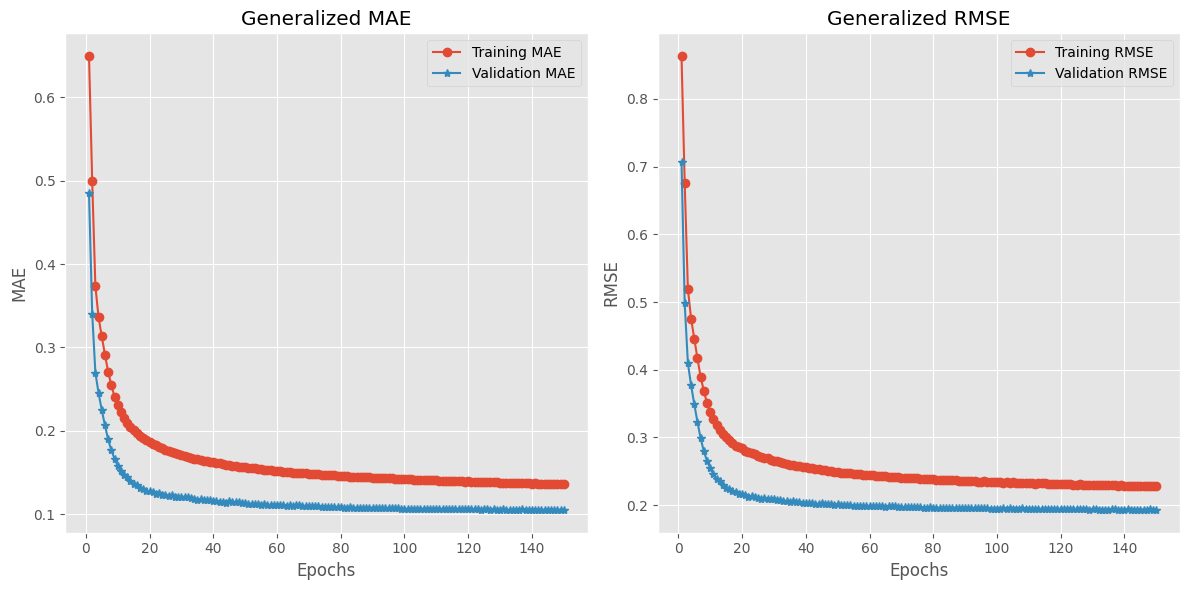

In [13]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [44]:
# model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
# model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
# model_all_train_read.to(device)
# model_all_train_read.eval()


In [45]:
# _, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon = 6,
#                                                                                     model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


In [ ]:
# outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [ ]:
# outputs = torch.cat(outputs_all_batches, dim=0)
# targets = torch.cat(targets_all_batches, dim=0)

# outputs = outputs.cpu()
# targets = targets.cpu()
# # Create a mask where arr1 equals 0


In [ ]:
# mask = (targets == 0.0)

# # Set elements to None (or np.nan for float compatibility)
# targets = np.where(mask, None, targets)
# outputs = np.where(mask, None, outputs)

In [43]:
# # index =4
# for index in range(12):
#     patient1_target = [sublist[index] for sublist in targets]
#     patient1_output = [sublist[index]  for sublist in outputs]
#     # patient1_output = outputs_all_batches[index]
#     # patient1_target = targets_all_batches[index]

#     # print(list(abs_patients_errors_PHs[6].values())[index])
#     # print(list(squared_patients_errors_PHs[6].values())[index])

#     plt.figure(figsize=(13,5))
#     plt.plot(patient1_target)
#     plt.plot(patient1_output)
#     plt.show()